In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("DATAstudents.csv")
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


"Grade" is the obvious target variable in this case. The goal of this analysis will be to analyse the contribution of various features towards predicting and causing the grade by analysing the relationships between variables and using classification and causal inference methods respectively. distribution of other features should also be plotted

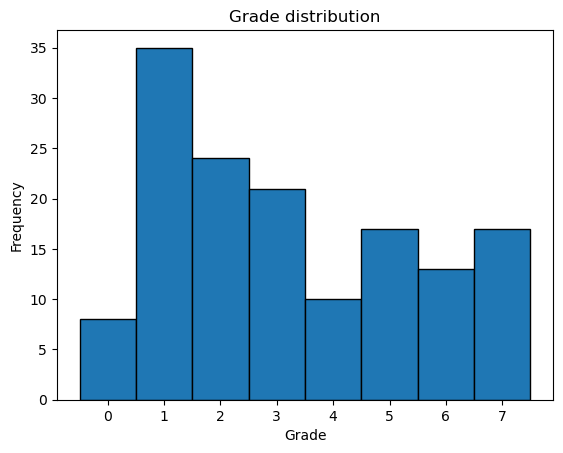

In [13]:
# plot grade distribution
plt.hist(df["GRADE"], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade distribution')
plt.show()

In [41]:
histcols = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13" ,"14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "COURSE ID"]

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>],
       [<AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>],
       [<AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSu

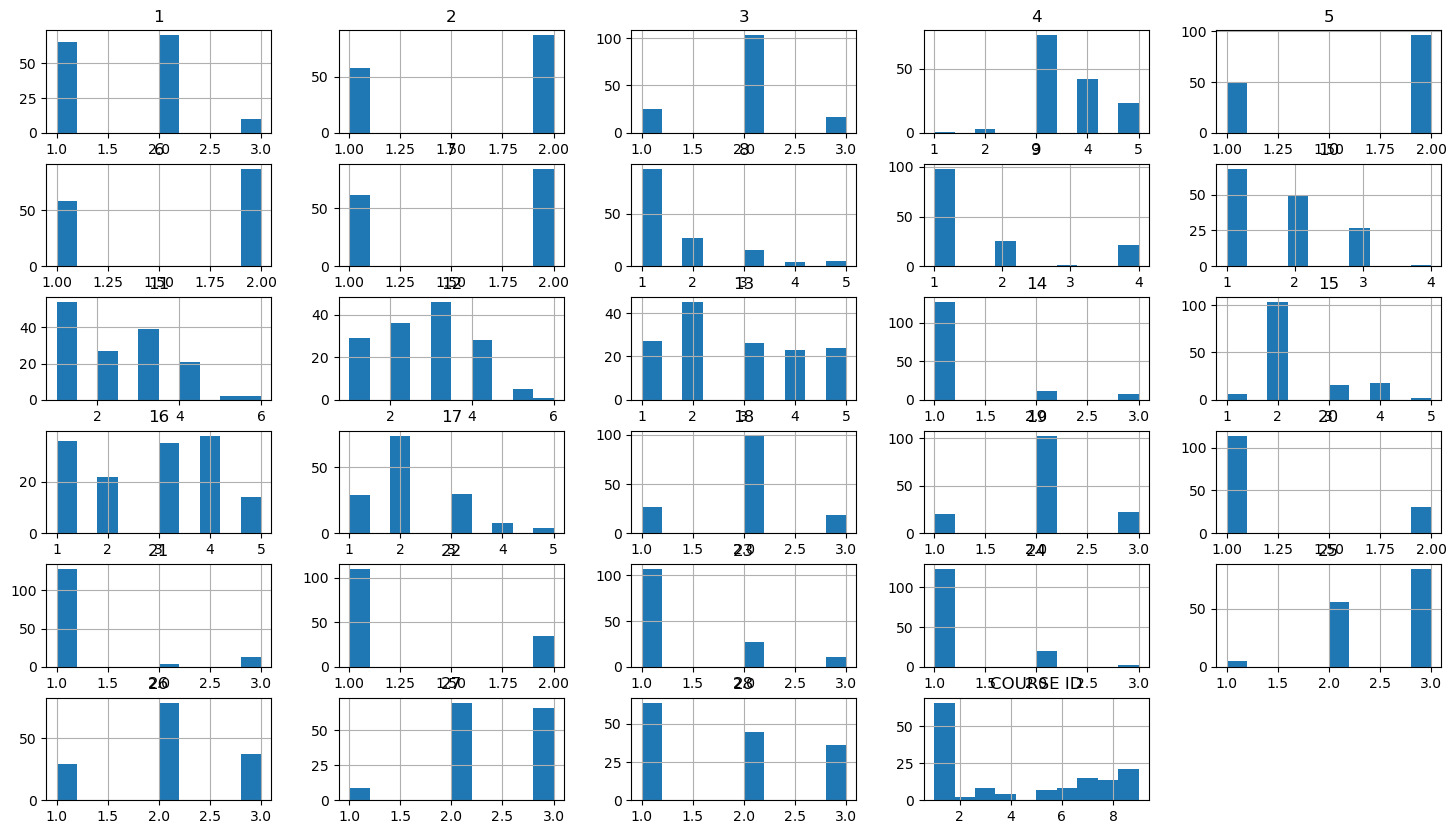

In [42]:
df.hist(histcols, figsize=(18,10))

based on this plot we can note some distributions are highly unbalanced.

moderately unbalanced: 4,9,17,22,23,25,27

highly unbalanced: 3,14,15,18,19,20,21,24

In [5]:
df.corr()

C:\Users\milo\AppData\Local\Temp\ipykernel_30060\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
1,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,-0.199257,...,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
2,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,-0.154957,...,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
3,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,-0.018990,...,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
4,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,0.036543,...,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
5,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,-0.152641,...,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
6,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,-0.227030,...,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
7,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,-0.168201,...,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
8,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,0.030177,...,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
9,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,0.327283,...,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289
10,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,0.030177,0.327283,1.000000,...,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.271997,0.023683


In [6]:
df.corr()["GRADE"]

C:\Users\milo\AppData\Local\Temp\ipykernel_30060\4218357644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["GRADE"]


1           -0.095251
2            0.335533
3            0.104821
4            0.023963
5            0.167445
6           -0.062993
7           -0.051778
8           -0.166352
9           -0.156289
10           0.023683
11           0.066318
12           0.063504
13           0.084470
14           0.066379
15          -0.030747
16          -0.044268
17          -0.033065
18           0.195617
19           0.003189
20          -0.184763
21          -0.203273
22          -0.139564
23           0.014638
24           0.073783
25           0.044862
26           0.085137
27           0.146547
28           0.110617
29           0.315493
30           0.248588
COURSE ID    0.142166
GRADE        1.000000
Name: GRADE, dtype: float64

These Corrplots are heavily limited by the nature of the categories used. The corr function assigns ordinality and linearity to the encoded features that is either not there or is contrary to the ordinality of the survey answers they represent. one such example is using 1,2,3 to represent +ve, -ve, neutral for feature 21:"Impact of your projects/activities on your success"
below shows 

In [45]:
df["GRADE"].mean()

3.2275862068965515

In [16]:
df[df["2"]==2]["GRADE"].mean()
# this is the mean grade for all male students

3.8275862068965516

In [17]:
df[df["2"]==1]["GRADE"].mean()
#mean grade for all female students

2.3275862068965516

In [18]:
df[df["21"]==1]["GRADE"].mean()
#where students saud +ve

3.390625

In [19]:
df[df["21"]==2]["GRADE"].mean()
#where students said -ve

2.25

In [20]:
df[df["21"]==3]["GRADE"].mean()
#where students said neutral

1.9230769230769231

while the above results may seem counterintuitive, one thing to consider for many of these categories is that they are not evenly distributed within the features at all

In [7]:
df[df["21"]==1]["GRADE"].count()

128

In [8]:
df[df["21"]==2]["GRADE"].count()

4

In [21]:
df[df["21"]==3]["GRADE"].count()

13

Class Labels

Student ID
1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
2- Sex (1: female, 2: male)
3- Graduated high-school type: (1: private, 2: state, 3: other)
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5- Additional work: (1: Yes, 2: No)
6- Regular artistic or sports activity: (1: Yes, 2: No)
7- Do you have a partner: (1: Yes, 2: No)
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22- Attendance to classes (1: always, 2: sometimes, 3: never)
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
26- Listening in classes: (1: never, 2: sometimes, 3: always)
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31- Course ID
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

the output grade column could be reproduced in numerical form based on the following conversions, using the average of each range of grades. 

AA	90.00 - 100.00
BA	85.00 - 89.00
BB	80.00 - 84.00
CB	75.00 - 79.00
CC	70.00 - 74.00
DC	60.00 - 69.00
DD	50.00 - 59.00
B		Successful (Başarılı)
FF	0.00 - 49.00	

# Dimensionality reduction
there are already many features sin this dataset, and several more will need to be added through 1 hot encoding. as a result, to miinimize the effects of the curse of dimensionality, where possible features will becombined/reduced through various different methods. Also, in some cases, due to the limited number of observations, categories(especially those with 5 or more categories) will be combined into simpler categories, as this increases the number of values in each category, and allows models to learn more about those features.

while features 29 and 30 definitely contribute to the final grade, they are as much dependent on the other results as the target dependent variable, and they will be set aside for the purposes of determining what IVs contribute the most to the final grade.

In [14]:
previous_grades = pd.DataFrame()
previous_grades['cumulative_gpa'] = df.pop('29')
previous_grades['expected_gpa'] = df.pop('30')
previous_grades

,cumulative_gpa,expected_gpa
0,1,1
1,2,3
2,2,2
3,3,2
4,2,2
...,...,...
140,3,3
141,5,3
142,4,3
143,5,3


In [18]:
df.drop(columns ="STUDENT ID",inplace = True)

In [19]:
df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,1,3,2,1,2,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,1,3,2,3,2,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,1,2,2,1,1,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,1,2,3,2,2,1,1,1
4,2,2,1,3,2,2,1,3,1,4,...,1,1,2,1,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,1,1,2,1,2,1,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,2,1,1,3,2,2,1,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,1,1,3,3,2,1,9,1
143,2,1,2,4,1,1,1,5,2,3,...,1,1,2,1,2,1,2,1,9,4


### BASIC DECISION TREE ALGORITHM
while dimenionality reduction and feature analysis will inevitably produce a much greater degree of information about the data, a basic decision tree will be valuable in learning about feature importances and providing a benchmark for accuracy going forward

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [24]:
X = df.drop(columns='GRADE')
y = df["GRADE"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [33]:
DTC = DecisionTreeClassifier(random_state=1)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [34]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.22
Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.27      0.35        11
           2       0.14      0.25      0.18         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.17      0.33      0.22         3
           6       0.00      0.00      0.00         6
           7       0.40      0.40      0.40         5

    accuracy                           0.22        37
   macro avg       0.19      0.28      0.21        37
weighted avg       0.24      0.22      0.21        37



In [36]:
importances = DTC.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

1: 0.0
2: 0.03917055753913757
3: 0.028277945619335342
4: 0.014773413897280957
5: 0.06376017158487236
6: 0.026352745077612226
7: 0.04187356609045272
8: 0.0
9: 0.025558912386706944
10: 0.024471299093655585
11: 0.08019500137324913
12: 0.07318083728959862
13: 0.05358807196937267
14: 0.0
15: 0.043532314239543915
16: 0.024471299093655585
17: 0.02900302114803625
18: 0.04563581433672067
19: 0.027162444805949336
20: 0.0
21: 0.0
22: 0.010876132930513593
23: 0.043504531722054374
24: 0.0
25: 0.036253776435045314
26: 0.07932750029426765
27: 0.05119551143720328
28: 0.034743202416918424
COURSE ID: 0.10309192921881735


while the accuracy is very low, and the feature importances are all also very low, some features have higher importance than others. Course ID, 11,12, 26 and 5, (parental incomes, listening in class, and undertaking additional work) have some of the highest relative feature importances. This warrants some amount of further investigation of these variables.

It is worth noting that while Course ID has the most significant impact on the classification, there is no way to interpret them. as a result their inclusion in vasios analyses will need to be justified separately


What are the actions that must be performed for appropriate feature analysis? false ordinality of some features needs to be removed through 1HE. While  3, 9, 10, 14, 15, 16, 23, 24, 28, or shifted in the case of 21.
On the other hand, what  steps aren't necessary but will potentially reduce dimensionality and increase accuracy? features can be combined, dropped, re encoded, and in some cases categories may be combined. 

In [43]:
# for row 21 re order the encoding
df["21"] = df["21"].replace({1:3, 2:1, 3:2})

It will be valuable to both visualise and statistically test the relatinships between various independent variables with the target/dependent variable. For comparing two categorical variables with each other, it is appropriate to use grouped bar plots

## Visual and statistical testing
adaptations of code from https://thinkingneuron.com/advertisement-click-classification-case-study-in-python/

In [47]:
pd.crosstab(index=df['3'], columns=df['GRADE'])

GRADE,0,1,2,3,4,5,6,7
3,,,,,,,,
1,2,8,5,4,2,0,1,3
2,6,21,17,16,7,13,11,12
3,0,6,2,1,1,4,1,2


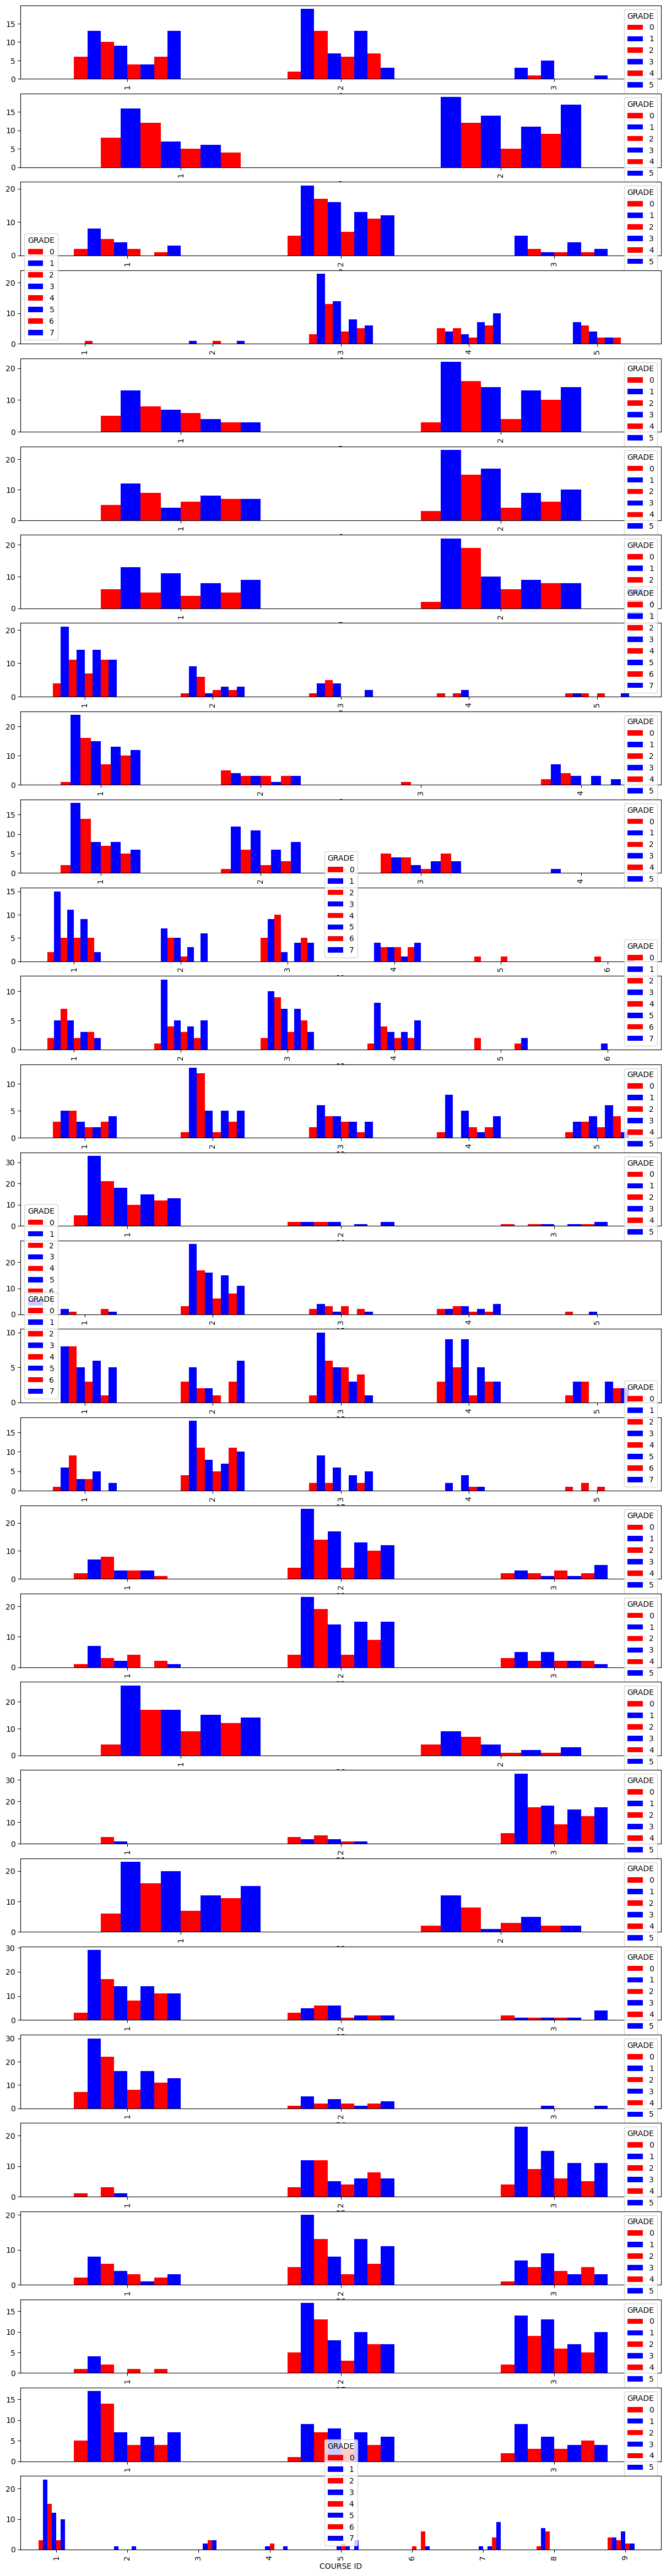

In [46]:

fig, PlotCanvas=plt.subplots(nrows=len(histcols), ncols=1, figsize=(15,60))

# grouped bar plots for each categorical predictor against the GRADE
for feature , i in zip(histcols, range(len(histcols))):
    ctabs=pd.crosstab(index=df[feature], columns=df['GRADE'])
    ctabs.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

The above graphs are quite difficult to interpret, mostly because the ordinality of the grade column isn't considered. measuring the impact of categories on the individual grades is of less value than measuring the impact on the average grade for each variable. Therefore, the case in which the grade is treated as continuous will be considered. There is also the option to condense down the grade column into 3, or even two separate variables for the purposes of making interpretation of relationships more valuable 

In [62]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [63]:
FunctionChisq(df,"GRADE",histcols)

1 is correlated with GRADE | P-Value: 0.010600848506691603
2 is correlated with GRADE | P-Value: 0.00045750000457329195
3 is NOT correlated with GRADE | P-Value: 0.6817663396822629
4 is correlated with GRADE | P-Value: 0.015834747164237575
5 is NOT correlated with GRADE | P-Value: 0.20961702594270926
6 is NOT correlated with GRADE | P-Value: 0.2430851822236686
7 is NOT correlated with GRADE | P-Value: 0.16955638640618678
8 is NOT correlated with GRADE | P-Value: 0.3991140153197072
9 is NOT correlated with GRADE | P-Value: 0.16656763548865255
10 is NOT correlated with GRADE | P-Value: 0.20573320038529846
11 is correlated with GRADE | P-Value: 0.03080207694420287
12 is NOT correlated with GRADE | P-Value: 0.5089951338362353
13 is NOT correlated with GRADE | P-Value: 0.5329756078648576
14 is NOT correlated with GRADE | P-Value: 0.6047709160966475
15 is NOT correlated with GRADE | P-Value: 0.26979664011654786
16 is NOT correlated with GRADE | P-Value: 0.24477348590406625
17 is NOT correlat

['1', '2', '4', '11', '21', 'COURSE ID']

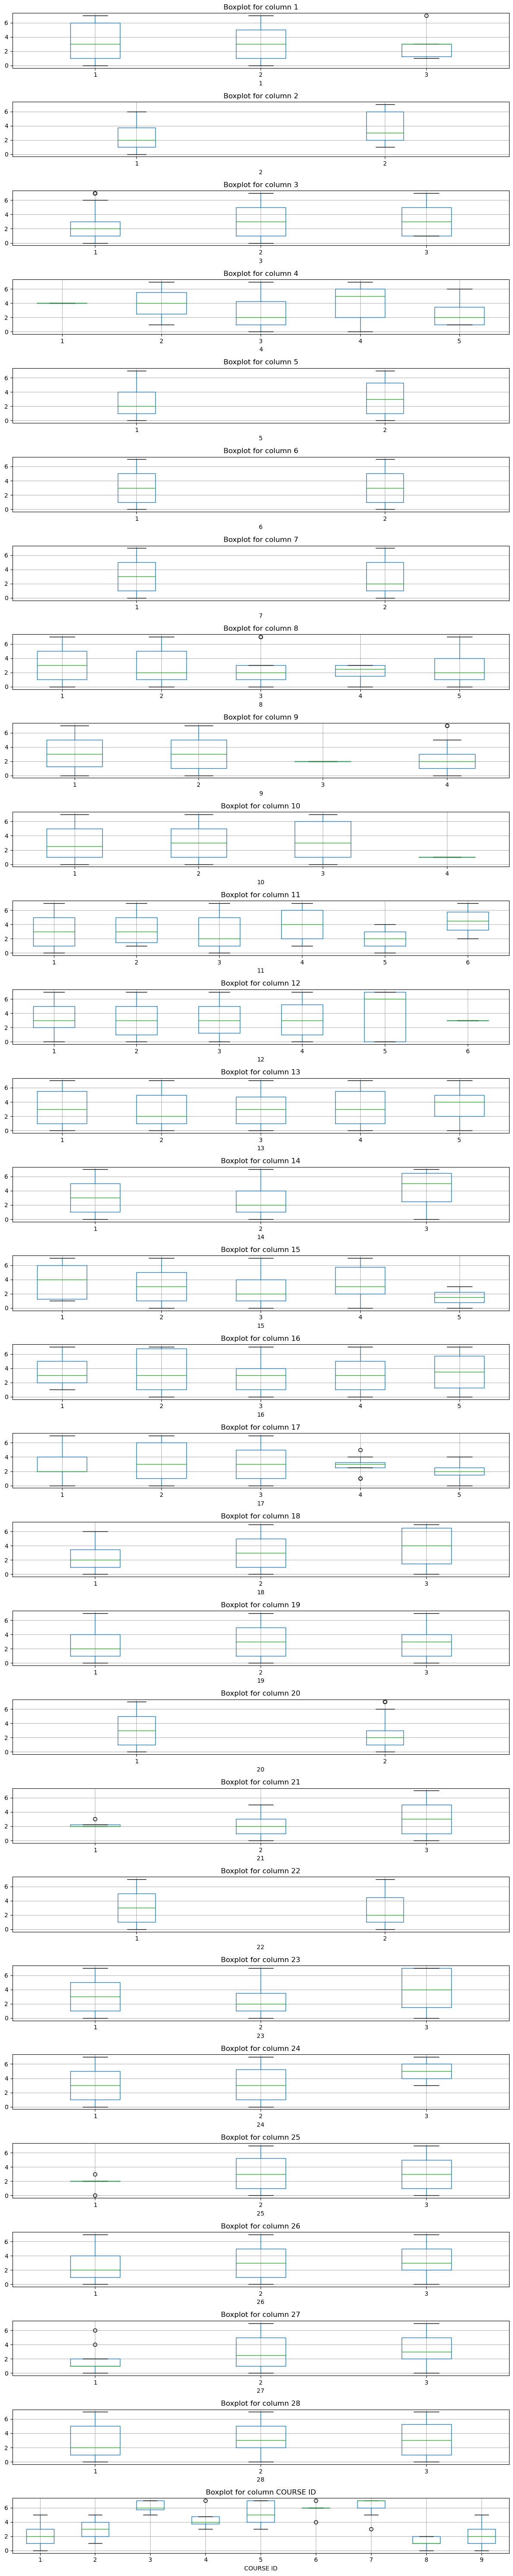

In [59]:
fig, PlotCanvas=plt.subplots(ncols=1, nrows=len(histcols), figsize=(12,60))

# creating box plots for each feature vs the GRADE as a continuous variable
for i, (feature) in enumerate(histcols):
    ax = df.boxplot(by=feature, column='GRADE', figsize=(4,6), vert=True, ax=PlotCanvas[i])
    ax.set_title(f'Boxplot for column {feature}')
    plt.subplots_adjust(hspace=0.5)
plt.suptitle('')
plt.tight_layout()

at first glance, differences in feature 6(regular artistic or sporting activity Y/n) seem to result in identical plots in the target. this suggests dropping this feature would be appropriate. aside from purely visual analysis, 

In [60]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [61]:
FunctionAnova(df,"GRADE",histcols)

##### ANOVA Results ##### 

1 is NOT correlated with GRADE | P-Value: 0.10529991792705393
2 is correlated with GRADE | P-Value: 0.0002360835579320827
3 is NOT correlated with GRADE | P-Value: 0.4135283631509535
4 is NOT correlated with GRADE | P-Value: 0.8614314520326636
5 is NOT correlated with GRADE | P-Value: 0.21239881833244129
6 is NOT correlated with GRADE | P-Value: 0.2472364140519931
7 is NOT correlated with GRADE | P-Value: 0.17067142163150886
8 is NOT correlated with GRADE | P-Value: 0.102476268581142
9 is NOT correlated with GRADE | P-Value: 0.3991944624574856
10 is NOT correlated with GRADE | P-Value: 0.17856748610896855
11 is NOT correlated with GRADE | P-Value: 0.07070638181368859
12 is NOT correlated with GRADE | P-Value: 0.8218348487588162
13 is NOT correlated with GRADE | P-Value: 0.389029827639521
14 is NOT correlated with GRADE | P-Value: 0.24671129182922089
15 is NOT correlated with GRADE | P-Value: 0.11466818338485865
16 is NOT correlated with GRADE | P-Value: 0.77

['2', '21', 'COURSE ID']

while this analysis was intended to only remove the least correlated features leaving several to contribute to predictions and causal inference , it seems like very few of them correlate well with the target variable in these analyses at this p value. One possible reason for this is the limited number of observations for each feature, and more importantly for each category, there may not be sufficient occurences of each category to measure accurately how it might be distributedand how it might affect the target value. Ideally at least 50% of these features would be kept, removing only the absolutely least correlated. 

selection of the threshold value alpha is an important step in statistical testing, especially because it is an arbitrary value. Changing the value of alpha after already seeing the results of the tests in order to change whether the null hypothesis is accepted or rejected and the statistical significance of the data being tested is known as p-hacking, and is a major issue in research whereby researchers can manipulate results such that they are more in line with what the researcher expected to see. while changing the alpha value in the case of this analysis would be possible, and would lead to more features being found to correlate with the target, it would be misleading and potentially unethical to do so. Increasing the risk of false positives for the purposes of choosing features in this scenario however is not a major issue, as if it increases the amount of features it increases the possibility that some algorith can find a pattern in those features that was not apparent.

a proposed solution for this will be to reject entirely only those features who's p values are particularly high, (over .2)(in either of the statistical tests done above,as this gives the freedom to treat the grade as either categorical or continuous going forward)
two datasets will be created, one with the strict, original statistical test threshold of .05, and one with the broad threshold of .2. the results of predictions using the two domains can then be compared to evaluate the differences and determine which should be used going forwards.

In [65]:
dfnarrowpval = df[['1', '2', '4', '11', '21', 'COURSE ID', 'GRADE']]

In [96]:
dfbroadpval = df[['1', '2', '4', '7', '8', '9', '10', '11', '15', '17', '18', '19', '21', '23', '25', 'COURSE ID', 'GRADE']]

with significantly less columns to deal with, methods for dealing with the columns going forward can now be comfortably decided. the list of columns to be one hot encoded is now 9, 10, 15, 23. Also two binary features should be reduced: 2,7

## Feature management

while there is no urgent need to remove categories with few occurences in ordinal features, these categories would add unnecessary dimensionality if encoded with 1he, so the balance plots for the variables will be consulted along with basic domain and feature knowledge in order to justify removal/condensation of some categories. This decision can be seen in appendix doc A

In cases where there are not enough occurences of a given category within a feature, that category should probably be either removed or condensed into other categories. This is appropriate because given too few occurences, algorithms will not be able to learn any rules relating to the category, rendering it's inclusion obsolete

In [84]:
def get_counts(col):
    for value, count in dfbroadpval[col].value_counts().items():
        print(f"Category {value}: {count} occurrences")

In [94]:
# it would actually be appropriate here to check all columns for underobserved cats
for column in dfbroadpval:
    print(column)
    get_counts(column)

1
Category 2: 70 occurrences
Category 1: 65 occurrences
Category 3: 10 occurrences
2
Category 2: 87 occurrences
Category 1: 58 occurrences
4
Category 3: 76 occurrences
Category 4: 42 occurrences
Category 5: 23 occurrences
Category 2: 3 occurrences
Category 1: 1 occurrences
7
Category 2: 84 occurrences
Category 1: 61 occurrences
8
Category 1: 93 occurrences
Category 2: 27 occurrences
Category 3: 16 occurrences
Category 5: 5 occurrences
Category 4: 4 occurrences
9
Category 1: 98 occurrences
Category 2: 25 occurrences
Category 4: 21 occurrences
Category 3: 1 occurrences
10
Category 1: 68 occurrences
Category 2: 49 occurrences
Category 3: 27 occurrences
Category 4: 1 occurrences
11
Category 1: 54 occurrences
Category 3: 39 occurrences
Category 2: 27 occurrences
Category 4: 21 occurrences
Category 5: 2 occurrences
Category 6: 2 occurrences
15
Category 2: 103 occurrences
Category 4: 18 occurrences
Category 3: 16 occurrences
Category 1: 6 occurrences
Category 5: 2 occurrences
17
Category 2: 7

aside from the columns that could be 1HE, it might be appropriate to condense cats in columns 4, 8, 11, 17, 21, 25, and possibly Course ID. this condensation will be revisited later, as it may be appropriate to test what effect additional category condensation would have on predictions.

In [85]:
get_counts("9")

Category 1: 98 occurrences
Category 2: 25 occurrences
Category 4: 21 occurrences
Category 3: 1 occurrences


in this case, the cat 3 corresponds to bicycle, and the category 4 corresponds to Other. as there is not enough occurences of the cat 3 for appropriate learning, and combining it with 4 doesn't comprimise the interpretability, those two cats will be combined before 1HE, and the new cat will be "Other", encoded as 3

In [97]:
dfbroadpval["9"] = dfbroadpval["9"].replace({4:3})
get_counts("9")

Category 1: 98 occurrences
Category 2: 25 occurrences
Category 3: 22 occurrences


C:\Users\milo\AppData\Local\Temp\ipykernel_30060\2712790251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbroadpval["9"] = dfbroadpval["9"].replace({4:3})


In [86]:
get_counts("10")

Category 1: 68 occurrences
Category 2: 49 occurrences
Category 3: 27 occurrences
Category 4: 1 occurrences


in this case, there is only 1 occurence of "Other". This cat should probably be combined, and while the choice is arbitrary it might be appropriate to combine the categories together as "with family or Other"

In [98]:
dfbroadpval["10"] = dfbroadpval["10"].replace({4:3})
get_counts("10")

Category 1: 68 occurrences
Category 2: 49 occurrences
Category 3: 28 occurrences


C:\Users\milo\AppData\Local\Temp\ipykernel_30060\901906398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbroadpval["10"] = dfbroadpval["10"].replace({4:3})


In [88]:
get_counts("15")

Category 2: 103 occurrences
Category 4: 18 occurrences
Category 3: 16 occurrences
Category 1: 6 occurrences
Category 5: 2 occurrences


while there are 6 possible outcomes here, there aren't any occurences of variable 6, corresponding to other. 2 cats have low occurences, and could be combined together under "self employed or retired"

as this feature has significantly more cats than others, and combination of them is slightly arbitrary, it could be beneficial to double check the plots produced comparing it to the GRADE column

<AxesSubplot:xlabel='15'>

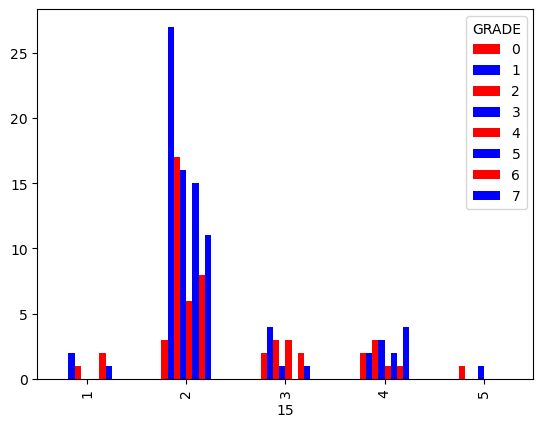

In [102]:
ctabs=pd.crosstab(index=dfbroadpval["15"], columns=dfbroadpval['GRADE'])
ctabs.plot.bar(color=['red','blue'])

<AxesSubplot:title={'center':'GRADE'}, xlabel='15'>

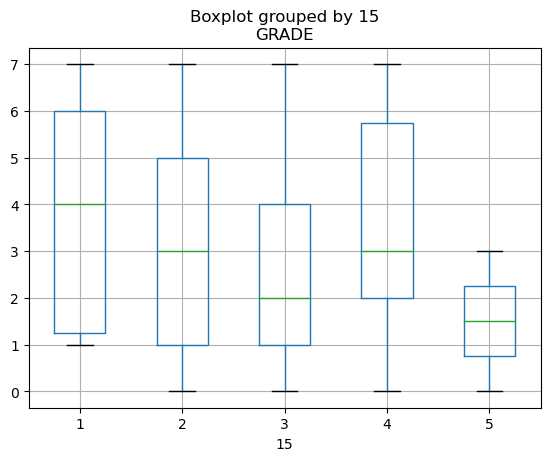

In [101]:

dfbroadpval.boxplot(by="15", column='GRADE')

the main thing to note here is that for private sector employee mothers(4), there is a bias towards higher grades that can't be found for other cats. there is nothing however that suggests any other combinations besides between cats 1 and 5 would be appropriate, so that will remain as the plan 

In [103]:
dfbroadpval["15"] = dfbroadpval["15"].replace({5:1})
get_counts("15")

Category 2: 103 occurrences
Category 4: 18 occurrences
Category 3: 16 occurrences
Category 1: 8 occurrences


C:\Users\milo\AppData\Local\Temp\ipykernel_30060\4221298017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbroadpval["15"] = dfbroadpval["15"].replace({5:1})


In [90]:
get_counts("23")

Category 1: 107 occurrences
Category 2: 27 occurrences
Category 3: 11 occurrences


in this case, given the interpretation of the three columns being noteably different, and there being ~sufficient occurences for each cat, all of them will be 1HEd

reducing 2 and 7

In [104]:
dfbroadpval["2"] = dfbroadpval["2"].replace({1:0,2:1})
# now interpretable as Male (1) or not male/female (0)

C:\Users\milo\AppData\Local\Temp\ipykernel_30060\563133341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbroadpval["2"] = dfbroadpval["2"].replace({1:0,2:1})


In [105]:
dfbroadpval["7"] = dfbroadpval["7"].replace({2:0})
# now interpretable as has a partner yes(1) or no(0)

C:\Users\milo\AppData\Local\Temp\ipykernel_30060\3294516180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbroadpval["7"] = dfbroadpval["7"].replace({2:0})


In [106]:
dfbroadpval.head(10)

,1,2,4,7,8,9,10,11,15,17,18,19,21,23,25,COURSE ID,GRADE
0,2,1,3,0,1,1,1,1,2,3,2,2,3,1,3,1,1
1,2,1,3,0,1,1,1,2,2,2,2,2,3,1,3,1,1
2,2,1,3,0,2,3,2,2,2,2,1,2,3,1,2,1,1
3,1,0,3,1,2,1,2,1,2,3,1,2,3,1,3,1,1
4,2,1,3,1,3,1,3,3,2,2,1,1,3,2,2,1,1
5,2,1,3,0,2,1,1,3,2,1,1,2,3,1,1,1,2
6,1,1,4,0,1,1,3,1,2,2,2,2,3,1,3,1,5
7,1,0,3,1,2,2,3,4,4,1,2,2,3,3,3,1,2
8,2,0,3,1,1,1,3,2,2,1,2,2,3,1,3,1,5
9,2,0,3,1,3,3,2,1,2,2,2,2,3,1,2,1,0


interpretation of all these columns can be viewed on appendix doc A

In [174]:
# copy through any transformations into dfnarrowpval, as it is just a subset of dfbroadpval
dfnarrowpval = dfbroadpval[['1', '2', '4', '11', '21', 'COURSE ID', 'GRADE']]
dfnarrowpval.head(10)

,1,2,4,11,21,COURSE ID,GRADE
0,2,1,3,1,3,1,1
1,2,1,3,2,3,1,1
2,2,1,3,2,3,1,1
3,1,0,3,1,3,1,1
4,2,1,3,3,3,1,1
5,2,1,3,3,3,1,2
6,1,1,4,1,3,1,5
7,1,0,3,4,3,1,2
8,2,0,3,2,3,1,5
9,2,0,3,1,3,1,0


this feature doesn't include any of the features that need one hot encoding, and can be used as is

In [111]:
columns_to_encode = ["9","10","15","23"]
prefixes = [f"{col} cat " for col in columns_to_encode]

pval_encoded = pd.get_dummies(dfbroadpval, columns=columns_to_encode, prefix=prefixes)
pval_encoded.head()

,1,2,4,7,8,11,17,18,19,21,...,10 cat _1,10 cat _2,10 cat _3,15 cat _1,15 cat _2,15 cat _3,15 cat _4,23 cat _1,23 cat _2,23 cat _3
0,2,1,3,0,1,1,3,2,2,3,...,1,0,0,0,1,0,0,1,0,0
1,2,1,3,0,1,2,2,2,2,3,...,1,0,0,0,1,0,0,1,0,0
2,2,1,3,0,2,2,2,1,2,3,...,0,1,0,0,1,0,0,1,0,0
3,1,0,3,1,2,1,3,1,2,3,...,0,1,0,0,1,0,0,1,0,0
4,2,1,3,1,3,3,2,1,1,3,...,0,0,1,0,1,0,0,0,1,0


#### It was determined that the required steps to ensure correct interpretation of features by models would be the IHE of non ordinal categorical features. As this would incur significant increases in dimensionality,  a significant amount of feature selection(reduction) was done prior to this. The reduced, 1HE datasets are considered to be the "minimally sufficiently transformed" datasets, and will serve as the basing point for both classification and causal inference methods. The influence of further feature analysis steps will be determined through their influence on the results of those methods.

# Classification 

Once more, a basic decision tree algorithm will be used as a baseline for comparison. Again, feature importance will be measured on the new feature set
## Decision Tree full grade cats(Broadpval)

In [112]:
X = pval_encoded.drop(columns='GRADE')
y = pval_encoded["GRADE"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [128]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.205


In [119]:
importances = DTC.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

1: 0.0337
2: 0.0578
4: 0.1205
7: 0.0498
8: 0.0555
11: 0.0703
17: 0.1196
18: 0.0328
19: 0.0435
21: 0.0274
25: 0.0395
COURSE ID: 0.1351
9 cat _1: 0.0000
9 cat _2: 0.0152
9 cat _3: 0.0089
10 cat _1: 0.0294
10 cat _2: 0.0136
10 cat _3: 0.0000
15 cat _1: 0.0174
15 cat _2: 0.0259
15 cat _3: 0.0312
15 cat _4: 0.0000
23 cat _1: 0.0250
23 cat _2: 0.0477
23 cat _3: 0.0000


In [129]:
# Performing k fold cross validation to evaluate the accuracy of the decision tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Set k=10 for 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Perform k-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(DTC, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.26666667 0.4        0.33333333 0.33333333 0.13333333 0.35714286
 0.21428571 0.21428571 0.28571429 0.21428571]
Mean Accuracy: 0.2752380952380952
Standard Deviation: 0.07777518622180686


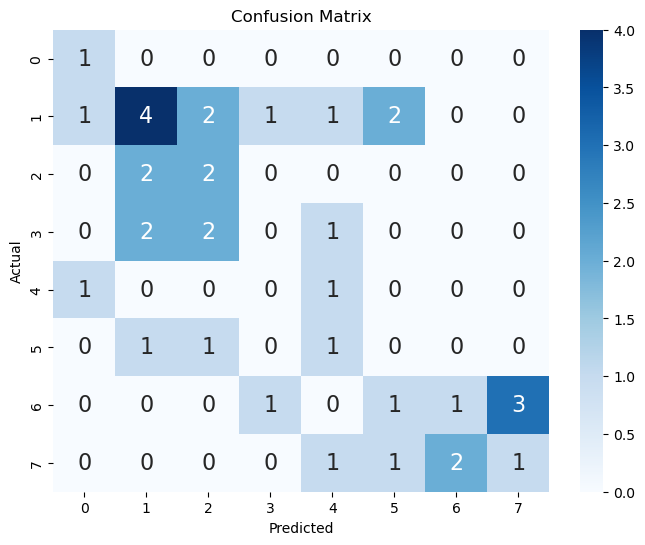

In [124]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

upon the first creation of the heatmap one of the things that was noted was the overall lack of values in general for a .25 test size relative to the size of the matrix. This will be solved both by reduction of the size of the matrix through condensation of the target variable, but also by increasing the test size to .3

###  Condensing the GRADE categories from 8 to 4
one thing to note here is that there are quite a lot of different grades to predict between. If this is a major contributor to not just the predictions of the model but also the learning of the model, then it would be valuable to condense the 8 grade band categories into 4 grades band categories and re train the model based on this new target variable.

as a reminder:
(0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

and:

AA	90.00 - 100.00

BA	85.00 - 89.00

BB	80.00 - 84.00

CB	75.00 - 79.00

CC	70.00 - 74.00

DC	60.00 - 69.00

DD	50.00 - 59.00

FF	0.00 - 49.00	

there is definitely a question of linearity involved with the treatment of this variable. The encoded 0-7 scale is not representative of the size of the differences on the 0-100 scale at all. However this is to some extent by design; the distribution amongst the different grades isn't linear, and the difficulty of increasing from one grade to the next is presumably non linear as well. 

after condensation, the encoding now becomes 

0 0.00 - 59.00

1 60.00 - 74.00

2 75.00 - 84.00

3 85.00 - 100.00

In [130]:
pval_encoded["grade4band"] =pval_encoded["GRADE"].replace({1:0, 2:1, 3:1, 4:2, 5:2, 6:3, 7:3})

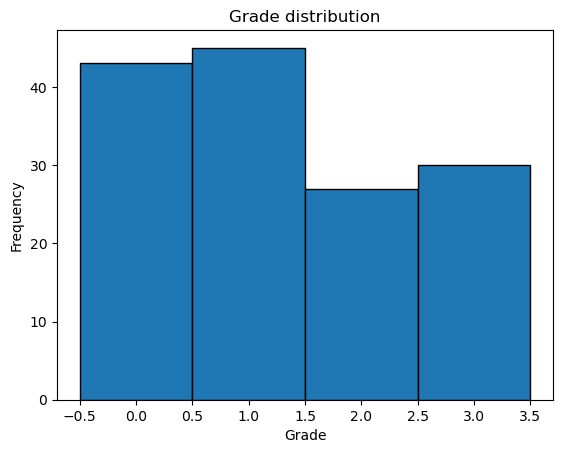

In [131]:
# plot new grade distribution
plt.hist(pval_encoded["grade4band"], bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade distribution')
plt.show()

## Decision Tree reduced grade cats (Broadpval)

In [140]:
X = pval_encoded.drop(columns=['GRADE', 'grade4band'])
y = pval_encoded["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.523


In [141]:
importances = DTC.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

1: 0.0204
2: 0.0480
4: 0.0267
7: 0.0737
8: 0.0446
11: 0.0882
17: 0.1360
18: 0.1035
19: 0.0292
21: 0.0498
25: 0.0000
COURSE ID: 0.2022
9 cat _1: 0.0539
9 cat _2: 0.0000
9 cat _3: 0.0000
10 cat _1: 0.0000
10 cat _2: 0.0314
10 cat _3: 0.0000
15 cat _1: 0.0179
15 cat _2: 0.0278
15 cat _3: 0.0000
15 cat _4: 0.0000
23 cat _1: 0.0314
23 cat _2: 0.0155
23 cat _3: 0.0000


In [142]:
# Perform k-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(DTC, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.33333333 0.4        0.26666667 0.6        0.53333333 0.5
 0.14285714 0.5        0.28571429 0.5       ]
Mean Accuracy: 0.40619047619047616
Standard Deviation: 0.1374046773274983


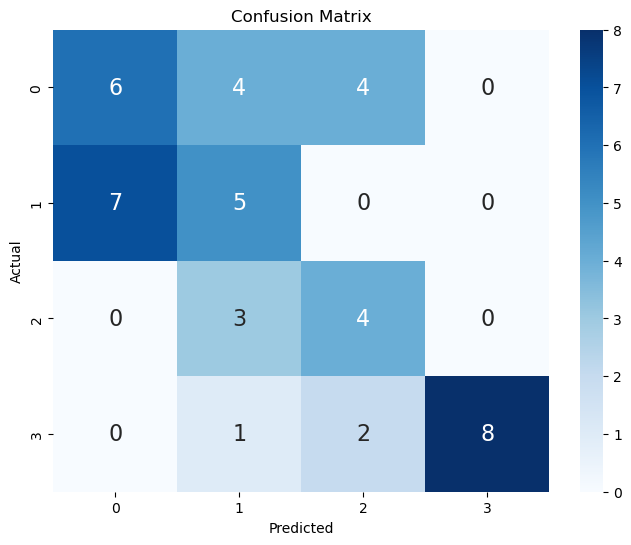

In [143]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

while this marks a very significant increase in the accuracy of the model with k fold validated accuracy of .41 as opposed to .26 in the case of 8 grade bands, the consequence of that is that the prediction itself contains less information. There may be more confidence that a student is likely to score higher, but less information about how high

## Decision Tree full grade cats(narrowpval)


In [144]:
X = dfnarrowpval.drop(columns='GRADE')
y = dfnarrowpval["GRADE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.341


In [145]:
importances = DTC.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

1: 0.0779
2: 0.0847
4: 0.2539
11: 0.2376
21: 0.0863
COURSE ID: 0.2595


In [146]:
# Perform k-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(DTC, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.46666667 0.26666667 0.26666667 0.33333333 0.2        0.57142857
 0.21428571 0.07142857 0.21428571 0.42857143]
Mean Accuracy: 0.30333333333333334
Standard Deviation: 0.14076322571710878


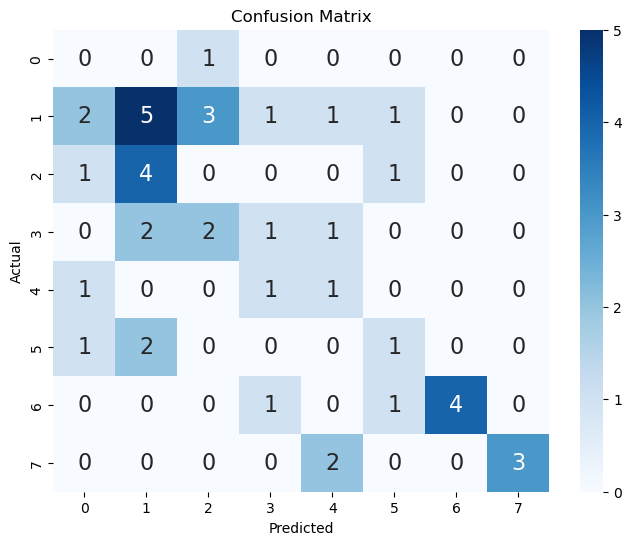

In [147]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree reduced grade cats(narrowpval)
also reducing the grade column for the narrowpval dataset

In [175]:
dfnarrowpval["grade4band"] = dfnarrowpval["GRADE"].replace({1:0, 2:1, 3:1, 4:2, 5:2, 6:3, 7:3})

C:\Users\milo\AppData\Local\Temp\ipykernel_30060\4243249784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnarrowpval["grade4band"] = dfnarrowpval["GRADE"].replace({1:0, 2:1, 3:1, 4:2, 5:2, 6:3, 7:3})


In [150]:
X = dfnarrowpval.drop(columns=['GRADE', 'grade4band'])
y = dfnarrowpval["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.455


In [151]:
# Perform k-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(DTC, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.4        0.53333333 0.33333333 0.26666667 0.6        0.35714286
 0.35714286 0.5        0.28571429 0.5       ]
Mean Accuracy: 0.4133333333333333
Standard Deviation: 0.10721796309377138


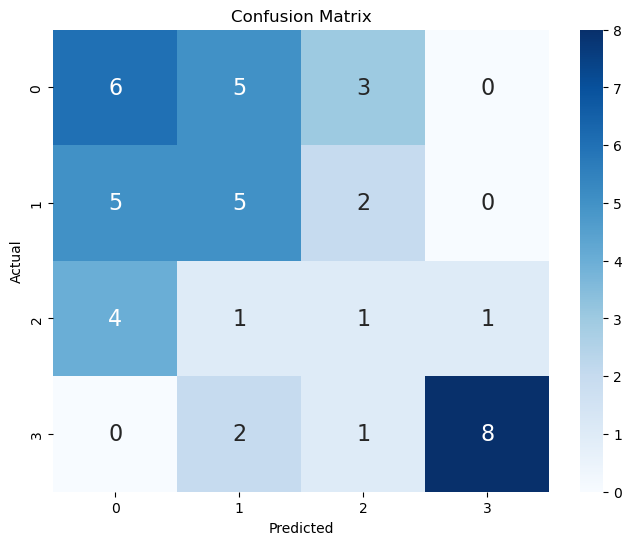

In [152]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

the cross validated scores shows that the data with less features from restrictive p value selection performs slightly less well in the case of the 8 band grade, but slightly better for the 4 band grade. These differnces are quite small are unlikely to remain in the case of differnt train test splits. As a result, given just the decision tree algorithm, it can be said there was NO significant benefit to the inclusion of all the extra features over the basic ones.

over the larger and smaller datasets, the 4 band grades feature was predicted at higher accuracy, and as such will be used to test the accuracy of various models going forward.

# Support Vector Machine(narrowp)

starting with the most basic form of the SVM

In [155]:
# https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC() 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

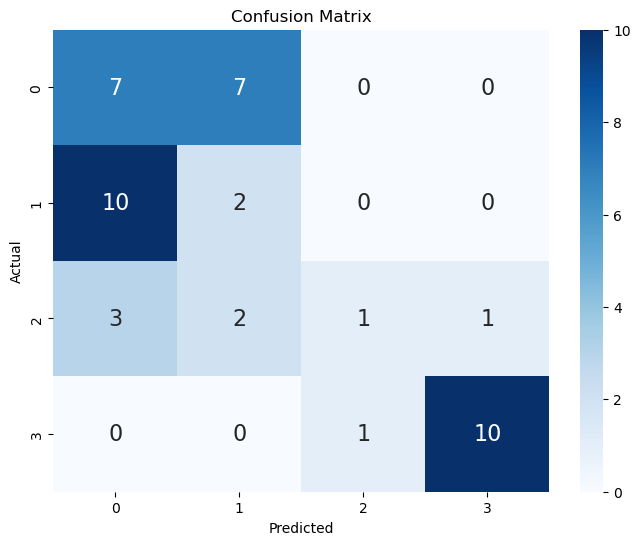

In [156]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [158]:
# Perform k-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.4        0.4        0.13333333 0.4        0.33333333 0.35714286
 0.21428571 0.21428571 0.28571429 0.57142857]
Mean Accuracy: 0.33095238095238094
Standard Deviation: 0.11880451368384676


## Support Vector Machine (broadp)

In [159]:
X = pval_encoded.drop(columns=['GRADE', 'grade4band'])
y = pval_encoded["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [160]:
# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Perform k-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.6        0.4        0.13333333 0.4        0.26666667 0.28571429
 0.21428571 0.14285714 0.28571429 0.71428571]
Mean Accuracy: 0.34428571428571425
Standard Deviation: 0.1798216551597696


Again, there is a slight improvement vs the prediction using the narrow p val dataset, but the std dev of the cross validation is much too high to describe this as a statistically significant difference between the two

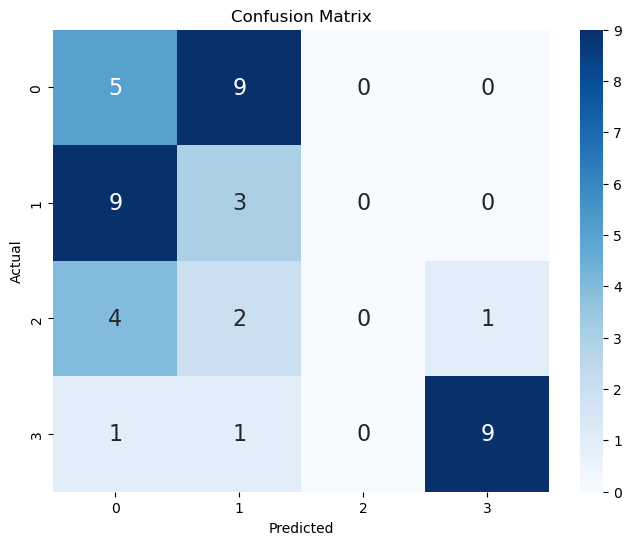

In [161]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

across both tests of the untuned SVM here, there are lower accuracies than for the decision tree algorithms. Also the SVM is far less likely to predict the category 2, and misclassifies 0 and 1 as each other particularly frequently.
also worth noting that one of the cross validated scores reaches 70% accuracy, so there are some splits of the data that allow the model to learn about the ppatterns and rules relatively well

in an attempt to increase the accuracy of the SVM model, various hyperparameters for the SVM model will be tuned. Initially GridsearchCV will be examined
## Hyperparameter tuning of SVM(broadp)

according to scikitlearn documentation the defaults of the SVM model are:

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [164]:
# https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['rbf',"linear","sigmoid","poly"]} 
clf = svm.SVC() 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.400 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.200 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.350 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.200 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.450 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.350 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.350 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.300 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.250 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 4/5] END ....C=1, gamma=

[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.450 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.381 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.400 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.150 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.350 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.250 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.238 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.250 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.250 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.300 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.200 total time=   0.0s
[CV 1/5] END .....C=10, gamm

[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.350 total time=   0.0s
[CV 1/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.143 total time=   0.0s
[CV 2/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.200 total time=   0.0s
[CV 3/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.200 total time=   0.0s
[CV 4/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.100 total time=   0.0s
[CV 5/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.250 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.524 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.550 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.450 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.450 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.300 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=100, gamm

[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.333 total time=   0.2s
[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.350 total time=   0.2s
[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.200 total time=   0.1s
[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.350 total time=   0.2s
[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.350 total time=   0.2s
[CV 1/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.250 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.200 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.286 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.350 total time=   0.0s
[CV 3/5] END ..C=1000, 

### Cross validated scoring results for the optimal parameters 
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.619 total time=   0.0s

[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s

[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s

[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.550 total time=   0.0s

[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.550 total time=   0.0s

In [165]:
print(grid.best_score_)

0.5038095238095238


This is a very significant increase in the accuracy of the model (34% -> 50%) and demonstrates the value of hypertuning

### visualising the results of the tuned model

Accuracy: 0.432


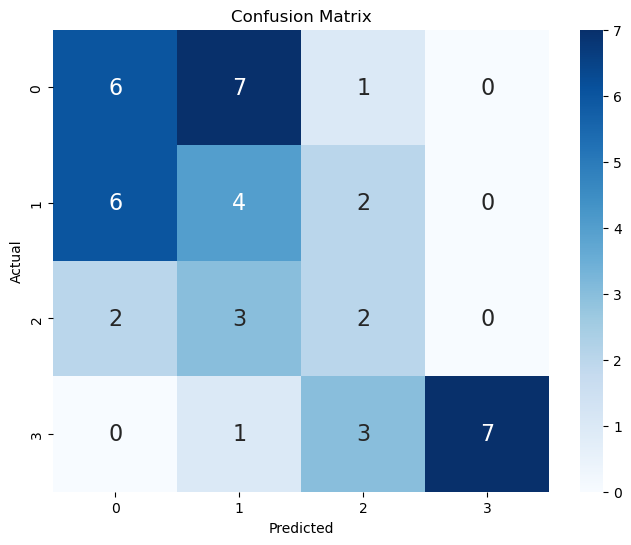

In [169]:
clf = svm.SVC(C = 10, gamma = 0.1, random_state = 11) 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix still shows the same misclassification of 1's and zeros, as well as an bias away from predicting category 2. this may be an artefact of the training and testing splits. 

### Check confusion matrix for different splitting of the data

In [170]:
X = pval_encoded.drop(columns=['GRADE', 'grade4band'])
y = pval_encoded["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

Accuracy: 0.500


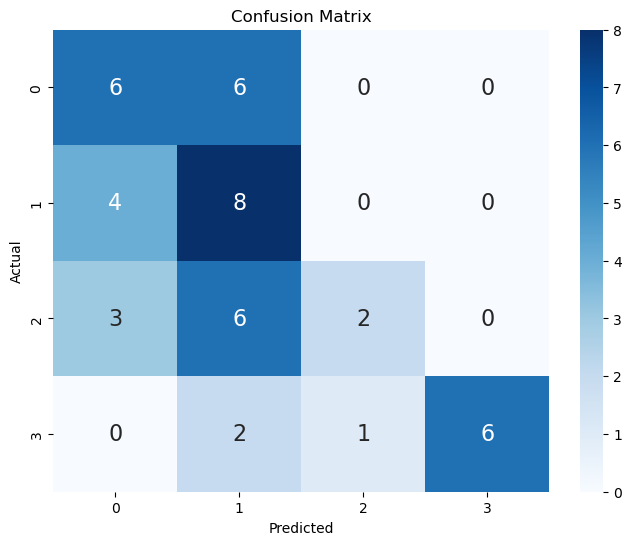

In [171]:
clf = svm.SVC(C = 10, gamma = 0.1, random_state = 11) 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

while the accuracy is higher, and there are far more predictions for category 1, the bias away from cat 2 and the misclassification of 0 and 1 remains

In [181]:
# importances = clf.feature_importances_

# for feature, importance in zip(X.columns, importances):
  #   print(f"{feature}: {importance:.4f}")

https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
49

"I have a dataset and I want to train my model on that data. After training, I need to know the features that are major contributors in the classification for a SVM classifier.

There is something called feature importance for forest algorithms, is there anything similar?"

"Yes, there is attribute coef_ for SVM classifier but it only works for SVM with linear kernel. For other kernels it is not possible because data are transformed by kernel method to another space, which is not related to input space, check the explanation."

## Hyperparameter tuning of SVM(narrowp)

In [176]:
X = dfnarrowpval.drop(columns=['GRADE', 'grade4band'])
y = dfnarrowpval["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [177]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['rbf',"linear","sigmoid","poly"]} 
clf = svm.SVC() 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.190 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.350 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.400 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.250 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.350 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.429 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.300 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.350 total time=   0.0s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.350 total time=   0.0s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.450 total time=   0.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.381 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.450 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.450 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.450 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.238 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.350 total time=   0.0s
[CV 3/5] END .....C=1, gamma

[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.350 total time=   0.1s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.350 total time=   0.0s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.450 total time=   0.1s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.550 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.238 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.350 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.350 total time=   0.0s
[CV 5/5] END ....C=10, gamma

[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.450 total time=   0.2s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.550 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.450 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.238 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.350 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.350 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.250 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.381 total time=   0.0s
[CV 2/5] END ..C=100, gamma=

[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.400 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.250 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.200 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.200 total time=   0.0s
[CV 4/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 5/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.150 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.300 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.350 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.350 total time=   0.0s
[CV 5/5] END ....C=1000, gam

### Cross validated scoring results for the optimal parameters for narrow p

[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.381 total time=   0.0s

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s

[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.550 total time=   0.0s

[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.450 total time=   0.0s

[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s

In [178]:
print(grid.best_score_)

0.4461904761904762


Accuracy: 0.500


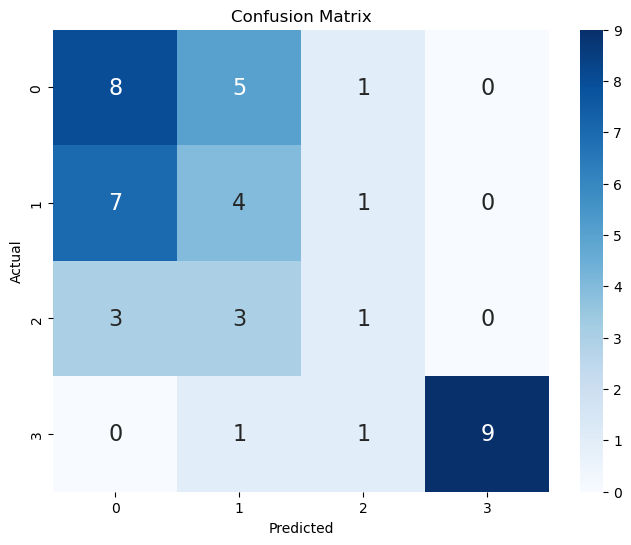

In [182]:
clf = svm.SVC(C = 10, gamma = 0.1, random_state = 11) 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

while previously the difference between the many(broadp) and less feature heavy(narrowp) datasets did not result in significantly different cross validated accuracies, there is a difference at this level of about 10%(.05/.50). Adding hyperameter tuning to a model makes the model more tailored to the data, and a more tailored model is more likely to pick up on less easily detectable patterns in the additional included features. Based on this, it is expected that an even more complex model would demonstrate an even larger discrepancy based on inclusion of more features. while there were concerns about excessive dimensionality earlier on in the analysis, it may be prudent to return to an earlier stage in the analysis and use a more complex model to determine if the inclusion of even more features would benefit the predictive ability of the model


Also note that the same pattern of underpredicting cat 2, and misclassifying cats 0 and 1 is still present. Looking back, this was also the case in the decision tree model confusion matrices. Combined with the check above for a different split, this implies that it is a result of the nature of the data, and the patterns in it are more random for feature 2 and between features between 0 and 1.

# XGBoost

https://www.nvidia.com/en-us/glossary/xgboost/#:~:text=XGBoost%2C%20which%20stands%20for%20Extreme,%2C%20classification%2C%20and%20ranking%20problems.

"XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems."

https://towardsdatascience.com/binary-classification-xgboost-hyperparameter-tuning-scenarios-by-non-exhaustive-grid-search-and-c261f4ce098d

"XGBoost is ditinguished from other gradient boosting techniques by its regularization mechanism to prevent overfitting."

In [184]:
from xgboost import XGBClassifier

## XGBClassifier untuned (broadpval)

Accuracy: 0.545


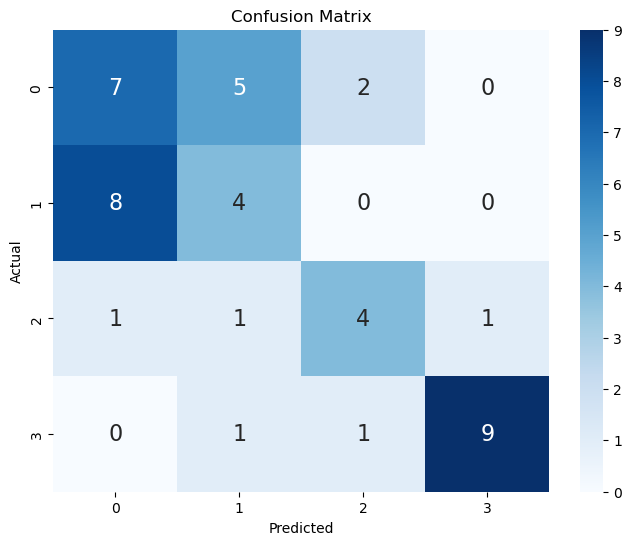

In [187]:
X = pval_encoded.drop(columns=['GRADE', 'grade4band'])
y = pval_encoded["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# fitting the model with just the default paramaters
xgbc0 = XGBClassifier()
xgbc0.fit(X_train , y_train)

#Predict the response for test dataset
y_pred = xgbc0.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XGBClassifier untuned (narrowpval)

Accuracy: 0.500


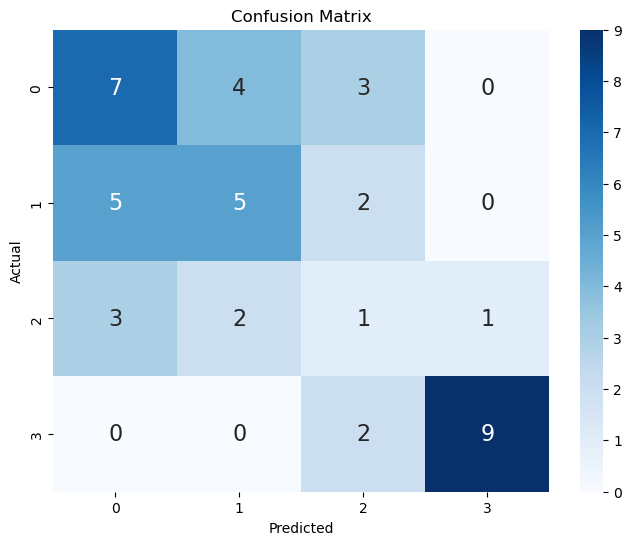

In [188]:
X = dfnarrowpval.drop(columns=['GRADE', 'grade4band'])
y = dfnarrowpval["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# fitting the model with just the default paramaters
xgbc0 = XGBClassifier()
xgbc0.fit(X_train , y_train)

#Predict the response for test dataset
y_pred = xgbc0.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [338]:
kfold = KFold(n_splits=15, shuffle=True, random_state=1)

# Perform k-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(xgbc0, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.4        0.4        0.7        0.5        0.3        0.4
 0.6        0.1        0.5        0.6        0.22222222 0.44444444
 0.22222222 0.66666667 0.33333333]
Mean Accuracy: 0.42592592592592593
Standard Deviation: 0.16746311757398835


In [249]:
xgb_clf = XGBClassifier()
print(xgb_clf.get_params())


{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


Already, without any hyperparameter tuning, this model is providing greater accuracies than previous ones for both subsets of the data. The broadpval set model is also predicting category 2 quite well, which is a first. the difference in accuracy between the two feature subsets will need to be verified further.

## Hyperparameter Tuning for XGBClassifier(narrowpval)

https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/

"It can be challenging to configure the hyperparameters of XGBoost models, which often leads to using large grid search experiments that are both time consuming and computationally expensive."

Thesome of the code below is also adapted from the above webpage

[0]	validation_0-mlogloss:1.20753	validation_1-mlogloss:1.24467
[1]	validation_0-mlogloss:1.07855	validation_1-mlogloss:1.16699
[2]	validation_0-mlogloss:0.97536	validation_1-mlogloss:1.11573
[3]	validation_0-mlogloss:0.89448	validation_1-mlogloss:1.08086
[4]	validation_0-mlogloss:0.82857	validation_1-mlogloss:1.05914
[5]	validation_0-mlogloss:0.77267	validation_1-mlogloss:1.04563
[6]	validation_0-mlogloss:0.72718	validation_1-mlogloss:1.04442
[7]	validation_0-mlogloss:0.68879	validation_1-mlogloss:1.04345
[8]	validation_0-mlogloss:0.66036	validation_1-mlogloss:1.04326
[9]	validation_0-mlogloss:0.63443	validation_1-mlogloss:1.04635
[10]	validation_0-mlogloss:0.60704	validation_1-mlogloss:1.04966
[11]	validation_0-mlogloss:0.58668	validation_1-mlogloss:1.05856
[12]	validation_0-mlogloss:0.55936	validation_1-mlogloss:1.07302
[13]	validation_0-mlogloss:0.54012	validation_1-mlogloss:1.08528
[14]	validation_0-mlogloss:0.52572	validation_1-mlogloss:1.08856
[15]	validation_0-mlogloss:0.51008	

C:\Users\milo\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-mlogloss:0.37192	validation_1-mlogloss:1.22059
[40]	validation_0-mlogloss:0.36923	validation_1-mlogloss:1.22168
[41]	validation_0-mlogloss:0.36621	validation_1-mlogloss:1.22190
[42]	validation_0-mlogloss:0.36384	validation_1-mlogloss:1.22904
[43]	validation_0-mlogloss:0.36139	validation_1-mlogloss:1.22632
[44]	validation_0-mlogloss:0.35983	validation_1-mlogloss:1.23117
[45]	validation_0-mlogloss:0.35695	validation_1-mlogloss:1.23590
[46]	validation_0-mlogloss:0.35496	validation_1-mlogloss:1.23668
[47]	validation_0-mlogloss:0.35296	validation_1-mlogloss:1.24740
[48]	validation_0-mlogloss:0.35127	validation_1-mlogloss:1.25199
[49]	validation_0-mlogloss:0.35002	validation_1-mlogloss:1.25405
[50]	validation_0-mlogloss:0.34873	validation_1-mlogloss:1.25510
[51]	validation_0-mlogloss:0.34730	validation_1-mlogloss:1.25758
[52]	validation_0-mlogloss:0.34623	validation_1-mlogloss:1.26278
[53]	validation_0-mlogloss:0.34454	validation_1-mlogloss:1.25972
[54]	validation_0-mloglos

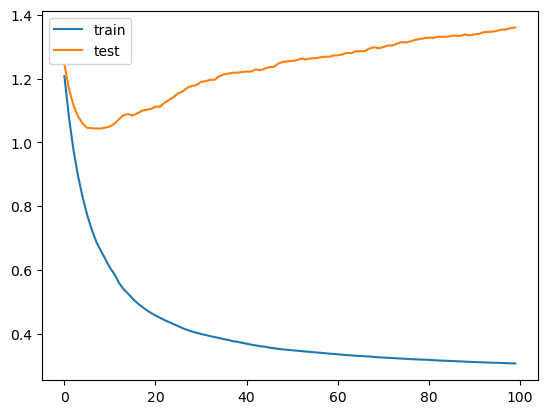

In [194]:
X = dfnarrowpval.drop(columns=['GRADE', 'grade4band'])
y = dfnarrowpval["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


xgbc1 = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

xgbc1.fit(X_train, y_train, eval_metric='mlogloss', eval_set=evalset)

# evaluate performance
yhat = xgbc1.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = xgbc1.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

[0]	validation_0-mlogloss:1.20753	validation_1-mlogloss:1.24467
[1]	validation_0-mlogloss:1.07855	validation_1-mlogloss:1.16699
[2]	validation_0-mlogloss:0.97536	validation_1-mlogloss:1.11573
[3]	validation_0-mlogloss:0.89448	validation_1-mlogloss:1.08086
[4]	validation_0-mlogloss:0.82857	validation_1-mlogloss:1.05914
[5]	validation_0-mlogloss:0.77267	validation_1-mlogloss:1.04563
[6]	validation_0-mlogloss:0.72718	validation_1-mlogloss:1.04442
[7]	validation_0-mlogloss:0.68879	validation_1-mlogloss:1.04345
[8]	validation_0-mlogloss:0.66036	validation_1-mlogloss:1.04326
[9]	validation_0-mlogloss:0.63443	validation_1-mlogloss:1.04635
[10]	validation_0-mlogloss:0.60704	validation_1-mlogloss:1.04966
[11]	validation_0-mlogloss:0.58668	validation_1-mlogloss:1.05856
[12]	validation_0-mlogloss:0.55936	validation_1-mlogloss:1.07302
[13]	validation_0-mlogloss:0.54012	validation_1-mlogloss:1.08528
[14]	validation_0-mlogloss:0.52572	validation_1-mlogloss:1.08856
[15]	validation_0-mlogloss:0.51008	

[126]	validation_0-mlogloss:0.29713	validation_1-mlogloss:1.39936
[127]	validation_0-mlogloss:0.29693	validation_1-mlogloss:1.40094
[128]	validation_0-mlogloss:0.29662	validation_1-mlogloss:1.40160
[129]	validation_0-mlogloss:0.29636	validation_1-mlogloss:1.40293
[130]	validation_0-mlogloss:0.29616	validation_1-mlogloss:1.40580
[131]	validation_0-mlogloss:0.29601	validation_1-mlogloss:1.40738
[132]	validation_0-mlogloss:0.29581	validation_1-mlogloss:1.40916
[133]	validation_0-mlogloss:0.29555	validation_1-mlogloss:1.41281
[134]	validation_0-mlogloss:0.29527	validation_1-mlogloss:1.41468
[135]	validation_0-mlogloss:0.29501	validation_1-mlogloss:1.41648
[136]	validation_0-mlogloss:0.29478	validation_1-mlogloss:1.41752
[137]	validation_0-mlogloss:0.29459	validation_1-mlogloss:1.41972
[138]	validation_0-mlogloss:0.29431	validation_1-mlogloss:1.42055
[139]	validation_0-mlogloss:0.29416	validation_1-mlogloss:1.42422
[140]	validation_0-mlogloss:0.29392	validation_1-mlogloss:1.42492
[141]	vali

[251]	validation_0-mlogloss:0.27776	validation_1-mlogloss:1.52700
[252]	validation_0-mlogloss:0.27767	validation_1-mlogloss:1.52630
[253]	validation_0-mlogloss:0.27759	validation_1-mlogloss:1.52697
[254]	validation_0-mlogloss:0.27747	validation_1-mlogloss:1.52661
[255]	validation_0-mlogloss:0.27730	validation_1-mlogloss:1.52807
[256]	validation_0-mlogloss:0.27717	validation_1-mlogloss:1.52898
[257]	validation_0-mlogloss:0.27700	validation_1-mlogloss:1.52953
[258]	validation_0-mlogloss:0.27691	validation_1-mlogloss:1.53050
[259]	validation_0-mlogloss:0.27681	validation_1-mlogloss:1.53031
[260]	validation_0-mlogloss:0.27672	validation_1-mlogloss:1.52988
[261]	validation_0-mlogloss:0.27664	validation_1-mlogloss:1.53055
[262]	validation_0-mlogloss:0.27657	validation_1-mlogloss:1.53175
[263]	validation_0-mlogloss:0.27650	validation_1-mlogloss:1.53136
[264]	validation_0-mlogloss:0.27643	validation_1-mlogloss:1.53329
[265]	validation_0-mlogloss:0.27635	validation_1-mlogloss:1.53381
[266]	vali

[376]	validation_0-mlogloss:0.26744	validation_1-mlogloss:1.57791
[377]	validation_0-mlogloss:0.26741	validation_1-mlogloss:1.57901
[378]	validation_0-mlogloss:0.26737	validation_1-mlogloss:1.58034
[379]	validation_0-mlogloss:0.26733	validation_1-mlogloss:1.57988
[380]	validation_0-mlogloss:0.26726	validation_1-mlogloss:1.58144
[381]	validation_0-mlogloss:0.26721	validation_1-mlogloss:1.58179
[382]	validation_0-mlogloss:0.26719	validation_1-mlogloss:1.58288
[383]	validation_0-mlogloss:0.26712	validation_1-mlogloss:1.58111
[384]	validation_0-mlogloss:0.26707	validation_1-mlogloss:1.58215
[385]	validation_0-mlogloss:0.26703	validation_1-mlogloss:1.58201
[386]	validation_0-mlogloss:0.26699	validation_1-mlogloss:1.58268
[387]	validation_0-mlogloss:0.26695	validation_1-mlogloss:1.58389
[388]	validation_0-mlogloss:0.26691	validation_1-mlogloss:1.58457
[389]	validation_0-mlogloss:0.26683	validation_1-mlogloss:1.58426
[390]	validation_0-mlogloss:0.26678	validation_1-mlogloss:1.58434
[391]	vali

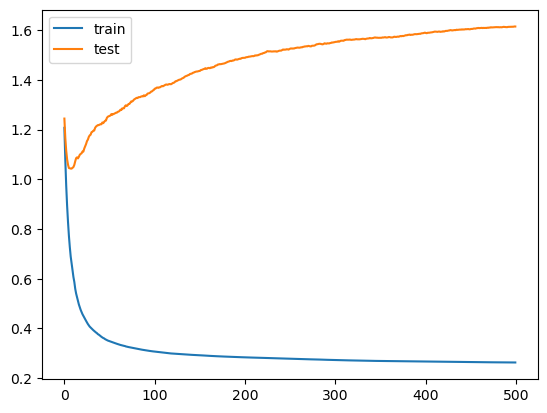

In [198]:
xgbc2 = XGBClassifier(n_estimators=500, eval_metric='mlogloss')
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

xgbc2.fit(X_train, y_train, eval_set=evalset)

# evaluate performance
yhat = xgbc2.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = xgbc2.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

[0]	validation_0-mlogloss:1.06112	validation_1-mlogloss:1.13932
[1]	validation_0-mlogloss:0.86784	validation_1-mlogloss:1.05896
[2]	validation_0-mlogloss:0.75308	validation_1-mlogloss:1.03921
[3]	validation_0-mlogloss:0.67466	validation_1-mlogloss:1.04249
[4]	validation_0-mlogloss:0.61988	validation_1-mlogloss:1.05245
[5]	validation_0-mlogloss:0.57513	validation_1-mlogloss:1.06788
[6]	validation_0-mlogloss:0.53818	validation_1-mlogloss:1.06957
[7]	validation_0-mlogloss:0.50039	validation_1-mlogloss:1.09002
[8]	validation_0-mlogloss:0.47753	validation_1-mlogloss:1.08807
[9]	validation_0-mlogloss:0.45909	validation_1-mlogloss:1.09783
[10]	validation_0-mlogloss:0.44520	validation_1-mlogloss:1.10334
[11]	validation_0-mlogloss:0.43251	validation_1-mlogloss:1.11487
[12]	validation_0-mlogloss:0.42170	validation_1-mlogloss:1.12018
[13]	validation_0-mlogloss:0.41066	validation_1-mlogloss:1.11521
[14]	validation_0-mlogloss:0.40188	validation_1-mlogloss:1.13135
[15]	validation_0-mlogloss:0.39389	

[126]	validation_0-mlogloss:0.27580	validation_1-mlogloss:1.50789
[127]	validation_0-mlogloss:0.27563	validation_1-mlogloss:1.51020
[128]	validation_0-mlogloss:0.27547	validation_1-mlogloss:1.51262
[129]	validation_0-mlogloss:0.27520	validation_1-mlogloss:1.51204
[130]	validation_0-mlogloss:0.27507	validation_1-mlogloss:1.51312
[131]	validation_0-mlogloss:0.27490	validation_1-mlogloss:1.51245
[132]	validation_0-mlogloss:0.27474	validation_1-mlogloss:1.51180
[133]	validation_0-mlogloss:0.27448	validation_1-mlogloss:1.51096
[134]	validation_0-mlogloss:0.27433	validation_1-mlogloss:1.51407
[135]	validation_0-mlogloss:0.27417	validation_1-mlogloss:1.51703
[136]	validation_0-mlogloss:0.27393	validation_1-mlogloss:1.51498
[137]	validation_0-mlogloss:0.27381	validation_1-mlogloss:1.51658
[138]	validation_0-mlogloss:0.27368	validation_1-mlogloss:1.51542
[139]	validation_0-mlogloss:0.27360	validation_1-mlogloss:1.51670
[140]	validation_0-mlogloss:0.27348	validation_1-mlogloss:1.51418
[141]	vali

[251]	validation_0-mlogloss:0.26250	validation_1-mlogloss:1.60248
[252]	validation_0-mlogloss:0.26243	validation_1-mlogloss:1.60215
[253]	validation_0-mlogloss:0.26241	validation_1-mlogloss:1.60451
[254]	validation_0-mlogloss:0.26237	validation_1-mlogloss:1.60438
[255]	validation_0-mlogloss:0.26230	validation_1-mlogloss:1.60332
[256]	validation_0-mlogloss:0.26226	validation_1-mlogloss:1.60654
[257]	validation_0-mlogloss:0.26221	validation_1-mlogloss:1.60554
[258]	validation_0-mlogloss:0.26217	validation_1-mlogloss:1.60677
[259]	validation_0-mlogloss:0.26214	validation_1-mlogloss:1.60739
[260]	validation_0-mlogloss:0.26199	validation_1-mlogloss:1.60759
[261]	validation_0-mlogloss:0.26194	validation_1-mlogloss:1.60799
[262]	validation_0-mlogloss:0.26189	validation_1-mlogloss:1.61060
[263]	validation_0-mlogloss:0.26183	validation_1-mlogloss:1.60890
[264]	validation_0-mlogloss:0.26175	validation_1-mlogloss:1.60869
[265]	validation_0-mlogloss:0.26164	validation_1-mlogloss:1.61003
[266]	vali

[376]	validation_0-mlogloss:0.25588	validation_1-mlogloss:1.66127
[377]	validation_0-mlogloss:0.25584	validation_1-mlogloss:1.66032
[378]	validation_0-mlogloss:0.25579	validation_1-mlogloss:1.66008
[379]	validation_0-mlogloss:0.25574	validation_1-mlogloss:1.66315
[380]	validation_0-mlogloss:0.25570	validation_1-mlogloss:1.66242
[381]	validation_0-mlogloss:0.25566	validation_1-mlogloss:1.66392
[382]	validation_0-mlogloss:0.25564	validation_1-mlogloss:1.66497
[383]	validation_0-mlogloss:0.25561	validation_1-mlogloss:1.66543
[384]	validation_0-mlogloss:0.25555	validation_1-mlogloss:1.66656
[385]	validation_0-mlogloss:0.25548	validation_1-mlogloss:1.66699
[386]	validation_0-mlogloss:0.25541	validation_1-mlogloss:1.66581
[387]	validation_0-mlogloss:0.25538	validation_1-mlogloss:1.66643
[388]	validation_0-mlogloss:0.25533	validation_1-mlogloss:1.66863
[389]	validation_0-mlogloss:0.25528	validation_1-mlogloss:1.66796
[390]	validation_0-mlogloss:0.25522	validation_1-mlogloss:1.66992
[391]	vali

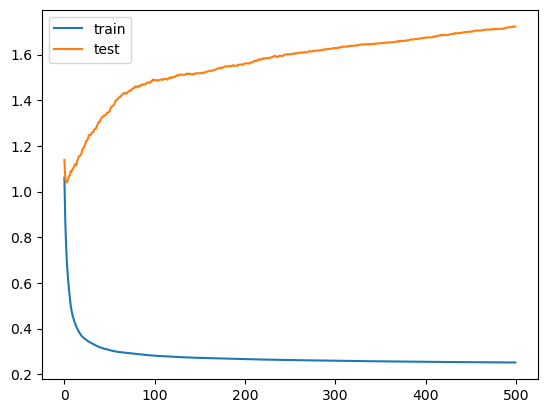

In [213]:
# "The long flat curves may suggest that the algorithm is learning too fast and we may benefit from slowing it down."

xgbc2 = XGBClassifier(n_estimators=500, eta = 0.6, eval_metric='mlogloss')
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

xgbc2.fit(X_train, y_train, eval_set=evalset)

# evaluate performance
#yhat = xgbc2.predict(X_test)

y_pred_proba = xgbc2.predict_proba(X_test)
y_pred = y_pred_proba.argmax(axis=1)

score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = xgbc2.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

[0]	validation_0-mlogloss:1.28596	validation_1-mlogloss:1.29296
[1]	validation_0-mlogloss:1.21680	validation_1-mlogloss:1.24734
[2]	validation_0-mlogloss:1.14756	validation_1-mlogloss:1.17435
[3]	validation_0-mlogloss:1.11501	validation_1-mlogloss:1.15560
[4]	validation_0-mlogloss:1.06446	validation_1-mlogloss:1.14191
[5]	validation_0-mlogloss:1.02172	validation_1-mlogloss:1.09847
[6]	validation_0-mlogloss:0.97783	validation_1-mlogloss:1.05777
[7]	validation_0-mlogloss:0.94734	validation_1-mlogloss:1.02664
[8]	validation_0-mlogloss:0.92180	validation_1-mlogloss:1.01346
[9]	validation_0-mlogloss:0.89651	validation_1-mlogloss:0.98871
[10]	validation_0-mlogloss:0.86964	validation_1-mlogloss:0.97606
[11]	validation_0-mlogloss:0.85686	validation_1-mlogloss:0.96650
[12]	validation_0-mlogloss:0.84546	validation_1-mlogloss:0.96585
[13]	validation_0-mlogloss:0.82540	validation_1-mlogloss:0.95127
[14]	validation_0-mlogloss:0.80897	validation_1-mlogloss:0.94917
[15]	validation_0-mlogloss:0.78835	

[126]	validation_0-mlogloss:0.39526	validation_1-mlogloss:1.09195
[127]	validation_0-mlogloss:0.39417	validation_1-mlogloss:1.09299
[128]	validation_0-mlogloss:0.39303	validation_1-mlogloss:1.09538
[129]	validation_0-mlogloss:0.39213	validation_1-mlogloss:1.09246
[130]	validation_0-mlogloss:0.39130	validation_1-mlogloss:1.09786
[131]	validation_0-mlogloss:0.39082	validation_1-mlogloss:1.09821
[132]	validation_0-mlogloss:0.38978	validation_1-mlogloss:1.10818
[133]	validation_0-mlogloss:0.38879	validation_1-mlogloss:1.11372
[134]	validation_0-mlogloss:0.38845	validation_1-mlogloss:1.11417
[135]	validation_0-mlogloss:0.38735	validation_1-mlogloss:1.11706
[136]	validation_0-mlogloss:0.38638	validation_1-mlogloss:1.12483
[137]	validation_0-mlogloss:0.38593	validation_1-mlogloss:1.12811
[138]	validation_0-mlogloss:0.38540	validation_1-mlogloss:1.13723
[139]	validation_0-mlogloss:0.38434	validation_1-mlogloss:1.13454
[140]	validation_0-mlogloss:0.38379	validation_1-mlogloss:1.13238
[141]	vali

[251]	validation_0-mlogloss:0.33924	validation_1-mlogloss:1.22692
[252]	validation_0-mlogloss:0.33924	validation_1-mlogloss:1.22760
[253]	validation_0-mlogloss:0.33889	validation_1-mlogloss:1.22457
[254]	validation_0-mlogloss:0.33895	validation_1-mlogloss:1.21949
[255]	validation_0-mlogloss:0.33806	validation_1-mlogloss:1.21316
[256]	validation_0-mlogloss:0.33802	validation_1-mlogloss:1.20867
[257]	validation_0-mlogloss:0.33811	validation_1-mlogloss:1.21503
[258]	validation_0-mlogloss:0.33778	validation_1-mlogloss:1.21211
[259]	validation_0-mlogloss:0.33718	validation_1-mlogloss:1.20995
[260]	validation_0-mlogloss:0.33676	validation_1-mlogloss:1.21917
[261]	validation_0-mlogloss:0.33635	validation_1-mlogloss:1.22556
[262]	validation_0-mlogloss:0.33625	validation_1-mlogloss:1.22743
[263]	validation_0-mlogloss:0.33608	validation_1-mlogloss:1.23451
[264]	validation_0-mlogloss:0.33539	validation_1-mlogloss:1.23497
[265]	validation_0-mlogloss:0.33550	validation_1-mlogloss:1.22840
[266]	vali

[376]	validation_0-mlogloss:0.31530	validation_1-mlogloss:1.34925
[377]	validation_0-mlogloss:0.31492	validation_1-mlogloss:1.34914
[378]	validation_0-mlogloss:0.31481	validation_1-mlogloss:1.34305
[379]	validation_0-mlogloss:0.31447	validation_1-mlogloss:1.35736
[380]	validation_0-mlogloss:0.31485	validation_1-mlogloss:1.36555
[381]	validation_0-mlogloss:0.31447	validation_1-mlogloss:1.35851
[382]	validation_0-mlogloss:0.31432	validation_1-mlogloss:1.35322
[383]	validation_0-mlogloss:0.31447	validation_1-mlogloss:1.35447
[384]	validation_0-mlogloss:0.31429	validation_1-mlogloss:1.35029
[385]	validation_0-mlogloss:0.31441	validation_1-mlogloss:1.35209
[386]	validation_0-mlogloss:0.31407	validation_1-mlogloss:1.34213
[387]	validation_0-mlogloss:0.31385	validation_1-mlogloss:1.35126
[388]	validation_0-mlogloss:0.31391	validation_1-mlogloss:1.34749
[389]	validation_0-mlogloss:0.31412	validation_1-mlogloss:1.33922
[390]	validation_0-mlogloss:0.31405	validation_1-mlogloss:1.34473
[391]	vali

[501]	validation_0-mlogloss:0.30074	validation_1-mlogloss:1.42562
[502]	validation_0-mlogloss:0.30079	validation_1-mlogloss:1.42956
[503]	validation_0-mlogloss:0.30084	validation_1-mlogloss:1.43895
[504]	validation_0-mlogloss:0.30077	validation_1-mlogloss:1.43349
[505]	validation_0-mlogloss:0.30071	validation_1-mlogloss:1.43708
[506]	validation_0-mlogloss:0.30076	validation_1-mlogloss:1.44149
[507]	validation_0-mlogloss:0.30065	validation_1-mlogloss:1.45179
[508]	validation_0-mlogloss:0.30070	validation_1-mlogloss:1.45725
[509]	validation_0-mlogloss:0.30028	validation_1-mlogloss:1.45032
[510]	validation_0-mlogloss:0.30005	validation_1-mlogloss:1.45524
[511]	validation_0-mlogloss:0.30013	validation_1-mlogloss:1.44980
[512]	validation_0-mlogloss:0.30000	validation_1-mlogloss:1.44435
[513]	validation_0-mlogloss:0.30002	validation_1-mlogloss:1.44171
[514]	validation_0-mlogloss:0.29988	validation_1-mlogloss:1.44001
[515]	validation_0-mlogloss:0.30025	validation_1-mlogloss:1.44011
[516]	vali

[626]	validation_0-mlogloss:0.29195	validation_1-mlogloss:1.50406
[627]	validation_0-mlogloss:0.29176	validation_1-mlogloss:1.50404
[628]	validation_0-mlogloss:0.29176	validation_1-mlogloss:1.50380
[629]	validation_0-mlogloss:0.29207	validation_1-mlogloss:1.50330
[630]	validation_0-mlogloss:0.29131	validation_1-mlogloss:1.51211
[631]	validation_0-mlogloss:0.29104	validation_1-mlogloss:1.51375
[632]	validation_0-mlogloss:0.29094	validation_1-mlogloss:1.51297
[633]	validation_0-mlogloss:0.29133	validation_1-mlogloss:1.51955
[634]	validation_0-mlogloss:0.29113	validation_1-mlogloss:1.52114
[635]	validation_0-mlogloss:0.29126	validation_1-mlogloss:1.51643
[636]	validation_0-mlogloss:0.29118	validation_1-mlogloss:1.51270
[637]	validation_0-mlogloss:0.29117	validation_1-mlogloss:1.51321
[638]	validation_0-mlogloss:0.29091	validation_1-mlogloss:1.51686
[639]	validation_0-mlogloss:0.29097	validation_1-mlogloss:1.51724
[640]	validation_0-mlogloss:0.29088	validation_1-mlogloss:1.51243
[641]	vali

[751]	validation_0-mlogloss:0.28610	validation_1-mlogloss:1.54365
[752]	validation_0-mlogloss:0.28631	validation_1-mlogloss:1.52545
[753]	validation_0-mlogloss:0.28633	validation_1-mlogloss:1.52963
[754]	validation_0-mlogloss:0.28643	validation_1-mlogloss:1.53180
[755]	validation_0-mlogloss:0.28656	validation_1-mlogloss:1.54132
[756]	validation_0-mlogloss:0.28616	validation_1-mlogloss:1.54137
[757]	validation_0-mlogloss:0.28595	validation_1-mlogloss:1.54385
[758]	validation_0-mlogloss:0.28555	validation_1-mlogloss:1.55628
[759]	validation_0-mlogloss:0.28555	validation_1-mlogloss:1.55735
[760]	validation_0-mlogloss:0.28534	validation_1-mlogloss:1.56304
[761]	validation_0-mlogloss:0.28537	validation_1-mlogloss:1.56533
[762]	validation_0-mlogloss:0.28532	validation_1-mlogloss:1.56749
[763]	validation_0-mlogloss:0.28514	validation_1-mlogloss:1.56714
[764]	validation_0-mlogloss:0.28510	validation_1-mlogloss:1.58061
[765]	validation_0-mlogloss:0.28501	validation_1-mlogloss:1.57495
[766]	vali

[876]	validation_0-mlogloss:0.28136	validation_1-mlogloss:1.68357
[877]	validation_0-mlogloss:0.28114	validation_1-mlogloss:1.68164
[878]	validation_0-mlogloss:0.28132	validation_1-mlogloss:1.67547
[879]	validation_0-mlogloss:0.28146	validation_1-mlogloss:1.67581
[880]	validation_0-mlogloss:0.28124	validation_1-mlogloss:1.67682
[881]	validation_0-mlogloss:0.28118	validation_1-mlogloss:1.67673
[882]	validation_0-mlogloss:0.28157	validation_1-mlogloss:1.67651
[883]	validation_0-mlogloss:0.28147	validation_1-mlogloss:1.67171
[884]	validation_0-mlogloss:0.28136	validation_1-mlogloss:1.67805
[885]	validation_0-mlogloss:0.28177	validation_1-mlogloss:1.68820
[886]	validation_0-mlogloss:0.28178	validation_1-mlogloss:1.68669
[887]	validation_0-mlogloss:0.28184	validation_1-mlogloss:1.69222
[888]	validation_0-mlogloss:0.28161	validation_1-mlogloss:1.68490
[889]	validation_0-mlogloss:0.28163	validation_1-mlogloss:1.68503
[890]	validation_0-mlogloss:0.28127	validation_1-mlogloss:1.68783
[891]	vali

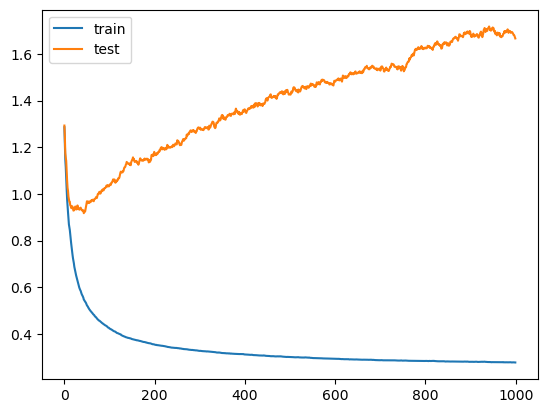

In [301]:

xgbc3 = XGBClassifier(n_estimators=1000, eta = 0.2, subsample=0.7, colsample_bytree=0.8, eval_metric='mlogloss')
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

xgbc3.fit(X_train, y_train, eval_set=evalset)

# evaluate performance
#yhat = xgbc2.predict(X_test)

y_pred_proba = xgbc3.predict_proba(X_test)
y_pred = y_pred_proba.argmax(axis=1)

score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = xgbc3.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

through manual manipulation found what seems to be a "local minimum"  with these params as n_estimators=500, eta = 0.7, subsample=0.3, colsample_bytree=0.4. the model with those hyperparams produces an accuracy of .659

another apparent local min at n_estimators=2000, eta = 0.07, subsample=0.3, colsample_bytree=0.4, giving an accuracy of .591

as a result a subset grid of params has been selected as appropriate for tuning based on features included in 
https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost and 
https://towardsdatascience.com/binary-classification-xgboost-hyperparameter-tuning-scenarios-by-non-exhaustive-grid-search-and-c261f4ce098d

In [322]:
params  = {
    'learning_rate': [0.7],
    'n_estimators': [500],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [.3],
    'gamma': [0, 0.1, 0.2, 0.3],
    'colsample_bytree': [.4],
    'reg_lambda': [0, 1, 5, 10],
    'reg_alpha': [0, 1, 5, 10]
}

xgbc4= XGBClassifier(objective="multi:softmax", tree_method='hist')
   
clf4 = GridSearchCV(estimator=xgbc4, param_grid=params, scoring='accuracy', verbose=3)# clf, param_grid, refit = True, verbose = 3
clf4.fit(X_train, y_train)
best_combination = clf4.best_params_
print(f" best combination of params : {best_combination}")

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.381 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.450 total time=   

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.143 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.238 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.600 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.400 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rat

[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.143 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.450 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.500 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=

[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_ra

[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.150 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_ra

[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.650 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_ra

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.550 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=

[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.143 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.550 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.190 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0

[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.150 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_ra

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_ra

[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.500 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_ra

[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.650 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.450 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0

[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learni

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.150 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.238 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.200 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.450 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate

[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_ra

[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.600 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.238 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_ra

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.190 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.400 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.550 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.

[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learnin

[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.200 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0, learning_rate=

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.238 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.550 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.400 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, 

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.143 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.550 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, le

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1,

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.150 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1,

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.700 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1,

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.143 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.650 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, le

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.550 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.238 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.500 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, le

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.150 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, 

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1,

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.600 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1,

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.700 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, lea

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, lea

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.150 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.238 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.450 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1,

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.600 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, le

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1,

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.650 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.190 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.200 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.400 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.200 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1,

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.429 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, le

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.600 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.238 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.500 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.450 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, 

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2,

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.200 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.200 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.100 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2,

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.750 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, lea

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.600 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.238 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.450 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.150 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, lea

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2,

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.600 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, le

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2,

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.600 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.238 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2,

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.143 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, 

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, 

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.450 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.400 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.400 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.700 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, l

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2,

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.550 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.190 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2,

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.150 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.100 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.400 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, lear

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.650 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.400 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, l

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.600 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.190 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.143 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.450 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.550 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, 

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.150 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.100 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, le

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3,

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.650 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.450 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3,

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.238 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.650 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.450 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, 

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.190 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.450 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.650 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, 

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.200 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.150 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=5, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.700 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, 

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3,

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.600 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.450 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.238 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3,

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.143 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.450 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.200 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.286 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=10, subsample=0.3;, score=0.250 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=0.3;, score=0.200 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.333 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=5, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, le

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.350 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.381 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.350 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.190 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.700 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=5, subsample=0.3;, score=0.350 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.333 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=3, n_estimators=500, reg_alpha=5, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, 

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=10, subsample=0.3;, score=0.350 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.143 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.400 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0, subsample=0.3;, score=0.600 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, le

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=0, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=10, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3,

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.100 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.400 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.3;, score=0.150 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=1, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, lear

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.286 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.250 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=10, reg_lambda=5, subsample=0.3;, score=0.300 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3,

Accuracy: 0.523


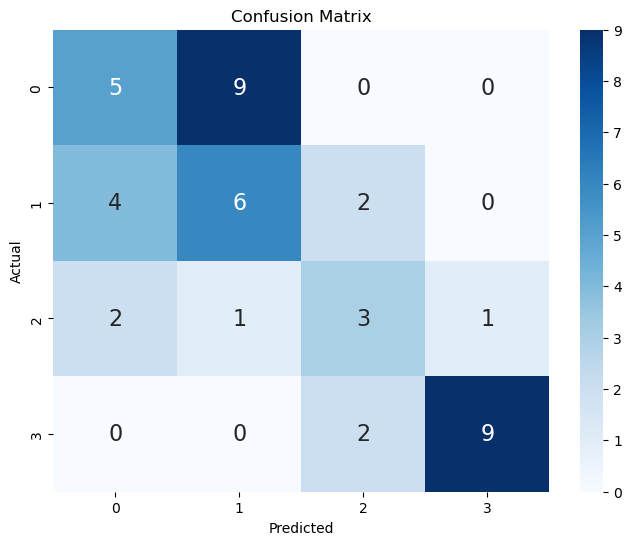

In [339]:
# fitting the model with just the best parameters
xgbc5 = XGBClassifier(n_estimators=500, eta = 0.7, subsample=0.3, colsample_bytree=0.4, 
                      gamma=0.1, max_depth=3, min_child_weight=5, reg_alpha=0, reg_lambda=0, 
                      objective="multi:softmax", tree_method='hist'
                      )
xgbc5.fit(X_train , y_train)

#Predict the response for test dataset
y_pred = xgbc5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [340]:
kfold = KFold(n_splits=15, shuffle=True, random_state=1)

# Perform k-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(xgbc5, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.4        0.5        0.4        0.6        0.3        0.5
 0.5        0.3        0.4        0.8        0.22222222 0.66666667
 0.22222222 0.44444444 0.22222222]
Mean Accuracy: 0.43185185185185193
Standard Deviation: 0.163846091922067


This isn't high as a cross validated accuracy, especially taking computation time into account, and significantly underperforms relative to the hypertuned SVM algorithms. Initial hyperparameter tuning using learning curves was done based on the specific split of the data that has been in use for much of this analysis, and the hyperparameters chosen throught that method are likely not conducive to generalised accuracy across splits. it would be possible to tune all the hyperparameters using the GridsearchCV method, but this would be extremely time intensive, and it may be best to avoid it.

## XGBClassifier(broadpval) 
Using the dataset with more features, the more complicated model may find significantly more subtle patterns with less important varables, and is expected to be significantly more accurate than previous models. However this will rely on the hyperparameter tuning, and will differ significantly for different splits of the data. as it seems the previous split used was particularly unrepresentative, a new split will be used, with random state = 3. At 13,14,8, and 9, this testing class balance isn't perfect, but accuracy is still a useful metric

Accuracy: 0.477


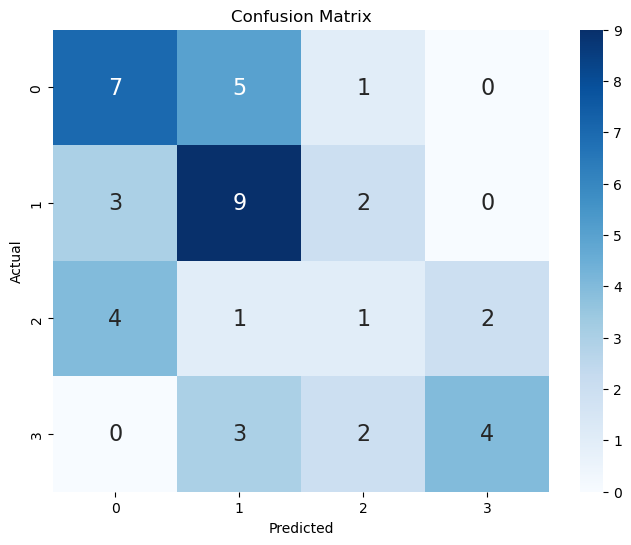

In [348]:
X = pval_encoded.drop(columns=['GRADE', 'grade4band'])
y = pval_encoded["grade4band"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

# fitting the model with just the default paramaters
xgbc0 = XGBClassifier()
xgbc0.fit(X_train , y_train)

#Predict the response for test dataset
y_pred = xgbc0.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XGBClassifier hyperparameter tuning(broadpval)
there seem to be issues with the previous hypertuning attempt, and as such the approach will be changed slightly

The one-sentence summary of Bayesian hyperparameter optimization is: build a probability model of the objective function and use it to select the most promising hyperparameters to evaluate in the true objective function.
https://github.com/WillKoehrsen/hyperparameter-optimization/blob/master/Bayesian%20Hyperparameter%20Optimization%20of%20Gradient%20Boosting%20Machine.ipynb

In [ ]:
!pip3 install bayesian_optimization==1.4.0
!pip3 install colorama==0.4.4

In [352]:
!pip install hyperopt

     ---------------------------------------- 1.6/1.6 MB 10.0 MB/s eta 0:00:00
     -------------------------------------- 200.5/200.5 kB 3.0 MB/s eta 0:00:00


method adapted from 
https://www.run.ai/guides/hyperparameter-tuning/bayesian-hyperparameter-optimization#:~:text=Bayesian%20optimization%E2%80%94tuning%20hyperparameters%20using,of%20test%20set%20generalization%20tasks.

In [354]:
def internal_method(C):

    xgbcbayes = XGBClassifier(C = C)

    xgbcbayes.fit(X_train, y_train)

    y_score = xgbcbayes.decision_function(X_test)

    f = accuracy_score(y_test, y_pred)

    return f

In [366]:
!pip install skopt

ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt


In [377]:
from bayes_opt import BayesianOptimization
bds = {"C": [0.1, 15]}
# Create a BayesianOptimization optimizer and optimize the function

optimizer = BayesianOptimization(f = internal_method, pbounds = bds, random_state = 7, verbose=2)
from skopt import space




search_space = {
    'learning_rate': space.Real(0.01, 1.0, prior='uniform', name='learning_rate'),
    'n_estimators': space.Integer(100, 1000, prior='uniform', name='n_estimators'),
    'max_depth': space.Integer(3, 10, prior='uniform', name='max_depth'),
    'min_child_weight': space.Integer(1, 10, prior='uniform', name='min_child_weight'),
    'subsample': space.Real(0.1, 1.0, prior='uniform', name='subsample'),
    'gamma': space.Real(0, 0.5, prior='uniform', name='gamma'),
    'colsample_bytree': space.Real(0.1, 1.0, prior='uniform', name='colsample_bytree'),
    'reg_lambda': space.Real(10**-3, 10**2, prior='log-uniform', name='reg_lambda'),
    'reg_alpha': space.Real(10**-3, 10**2, prior='log-uniform', name='reg_alpha')
}

from skopt import BayesSearchCV

optimiser = BayesSearchCV(
    estimator=XGBClassifier(),
    search_spaces=search_space,
    scoring='accuracy',
    cv=5,
    n_iter=100,
    return_train_score=False,
    n_jobs=-1
)

optimiser.fit(X,y)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                             'min_child_weight': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
        

In [376]:
# for iter=10
best_hyperparameters = optimiser.best_params_
best_score = optimiser.best_score_
best_hyperparameters,best_score

(OrderedDict([('colsample_bytree', 0.9679736424624267),
              ('gamma', 0.47239642265459875),
              ('learning_rate', 0.7722636448142741),
              ('max_depth', 6),
              ('min_child_weight', 1),
              ('n_estimators', 238),
              ('reg_alpha', 0.0025633368547946325),
              ('reg_lambda', 0.0018906943940700223),
              ('subsample', 0.7200991833936637)]),
 0.4482758620689656)

In [378]:
# for iter=100
best_hyperparameters100 = optimiser.best_params_
best_score100 = optimiser.best_score_
best_hyperparameters100,best_score100

(OrderedDict([('colsample_bytree', 0.4410853117436223),
              ('gamma', 0.439469772047189),
              ('learning_rate', 0.2547619015404097),
              ('max_depth', 7),
              ('min_child_weight', 1),
              ('n_estimators', 379),
              ('reg_alpha', 0.43662660663702396),
              ('reg_lambda', 100.0),
              ('subsample', 0.7493576041592269)]),
 0.48275862068965514)

It can be seen that increasing the number of iterations generates increased cross validated accuracy  as well as training time significantly. it is likely that further 



C:\Users\milo\Anaconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


Accuracy: 0.591


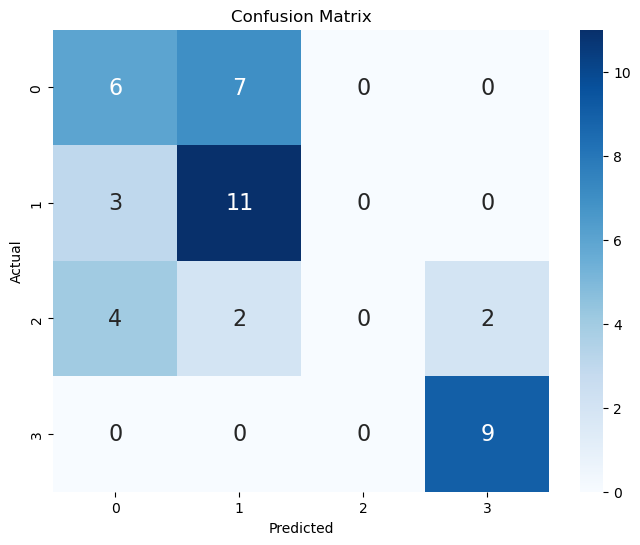

In [388]:
#Predict the response for test dataset
y_pred = optimiser.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

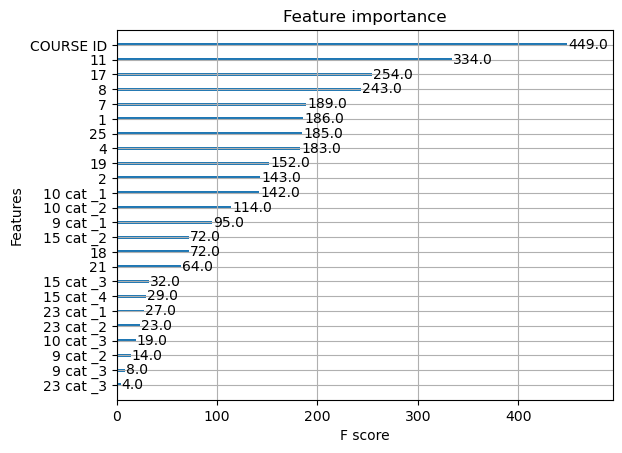

In [392]:
optXGB = XGBClassifier([('colsample_bytree', 0.4410853117436223),
              ('gamma', 0.439469772047189),
              ('learning_rate', 0.2547619015404097),
              ('max_depth', 7),
              ('min_child_weight', 1),
              ('n_estimators', 379),
              ('reg_alpha', 0.43662660663702396),
              ('reg_lambda', 100.0),
              ('subsample', 0.7493576041592269)])
optXGB.fit(X, y)
# plot feature importance
plot_importance(optXGB)
plt.show()

this new graph is very interesting. aside from the course the student is doing, three of the best predictors are the education level of the students mother, the weekly study hours, and the total weekly salary of the student are the three most important predictors in determining a students grade.